<h1 align="center"> Анализ бизнес-показателей приложения Procrastinate Pro+ </h1>
    
В нашем распоряжении находятся данные о посещениях и покупках пользователей развлекательного приложения Procrastinate Pro+ и рекламных расходах компании в период с 1 мая по 27 октября 2019 года. Чтобы привлечь больше пользователей и увеличить выручку, компания вкладывает значительные средства в рекламу. Тем не менее, выручка от продаж в приложении последние несколько месяцев оказывается ниже затрат на рекламу.

__Цель:__
    
Найти причины неэффективности рекламных расходов и дать рекомендации отделу маркетинга для исправления ситуации.
    
__Порядок выполнения исследования:__
* загрузка и предобрабока предоставленных данных;
* задание функций для расчета и анализа метрик (LTV, CAC, ROI, удержание, конверсия) и их визуализации;
* получение профилей пользователей, определение минимальной и максимальной даты привлечения клиентов;
* определение стран пользователей, абсолютного и относительного количества платящих пользователей из этих стран;
* определение устройств, которые предпочитают пользователи, доли платящих для каждого устройства;
* определение рекламных источников, абсолютного и относительного числа платящих для каждого канала привлечения;
* подсчет общих расходов на маркетинг и по отдельным рекламным источникам;
* визуализация изменения расходов за неделю и за месяц для каждого рекламного канала;
* визуализация динамики привлечения клиентов для каждого рекламного канала;
* определение средней стоимости привлечения отдельного пользователя (САС) для каждого источника;
* анализ окупаемости рекламы за две недели лайфтайма для среднего пользователя;
* проверка конверсии и удержания для среднего пользователя;
* анализ окупаемости рекламы с разбивкой по устройствам, странам и рекламным каналам;
* анализ окупаемости рекламы отдельно для пользователей из Европы и США;
* исследование затрат на самый убыточный рекламный канал;
* формулирование итоговых выводов проведенного анализа и рекомендаций для отдела маркетинга.

### Загрузка данных и подготовка их к анализу

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Загружаем исходные данные:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
)

Посмотрим на данные:

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Во-первых, лучше переименовать столбцы в более универсальный стиль именования - snake_case. Во-вторых, проверить датафрейм на дублирование строк и, наконец, проверить типы данных в столбцах.

Напишем функцию, которая слегка автоматизирует этот процесс:

In [4]:
def data_review(df):
    
    ''' Функция принимает на входе датафрейм, выводит на экран первые пять строк,
        считает и выводит общее количество полных дубликатов строк,
        переводит в нижний регистр названия столбцов,
        пробелы в названиях столбцов заменяет на нижнее подчеркивание,
        выводит краткую сводку по получившемуся датафрейму. '''

    
    print('\033[1m' + 'Первые пять строк таблицы:' + '\033[0m' + '\n', 
          df.head(), '\n'
         )
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m'
          , df.duplicated().sum(), '\n', '\n'
          , '\033[1m' + 'Краткая сводка:' + '\033[0m'
         )
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.info()

Применим функцию к первому датафрейму:

In [5]:
data_review(visits)

Первые пять строк таблицы:
         User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40   

Количество дубликатов в таблице: 0 
 
 Краткая сводка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  obj

Мы видим, что пропусков в данных нет, все столбцы заполнены. По  типу данных - столбцы времени начала и конца сессии нужно привести к формату даты и времени.

In [6]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Теперь посмотрим на следующий датафрейм:

In [7]:
data_review(orders)

Первые пять строк таблицы:
         User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99 

Количество дубликатов в таблице: 0 
 
 Краткая сводка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
# конвертируем в правильный формат столбец с датой и временем:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

И, наконец, третий датафрейм:

In [9]:
data_review(costs)

Первые пять строк таблицы:
            dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1 

Количество дубликатов в таблице: 0 
 
 Краткая сводка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Исправляем:

In [10]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим также категориальные колонки на неявные дубликаты:

In [11]:
# в датафрейме visits
print(visits['region'].unique(), '\n')
print(visits['device'].unique(), '\n')
print(visits['channel'].unique())

['United States' 'UK' 'France' 'Germany'] 

['iPhone' 'Mac' 'Android' 'PC'] 

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [12]:
# в датафрейме orders
print(orders['revenue'].unique())

[ 4.99  5.99  9.99 49.99 19.99]


In [13]:
# в датафрейме costs
print(costs['channel'].unique())

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Ничего подозрительного не обнаружили.

На этом предобработку данных можно завершить.

Для выполнения проекта были предоставлены три датасета с данными о визитах пользователей, сделанных ими заказах и расходах компании на рекламные источники. Данные были изучены на предмет пропусков и дубликатов, в том числе неявных. Наменования столбцов приведены к единому стилю, типы данных в колонках преобразованы в соответствии с сохраненными в них значениями. Таким образом, данные были подготовлены к дальнейшему анализу.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

В ходе анализа мы будем использовать готовые функции для вычисления значений метрик и построения графиков. Функция для создания профилей пользователей была немного изменена, чтобы соответствовать предоставленным данным: была убрана часть с добавлением флагов событий, т.к. у нас нет журнала событий. Также, был скорректирован способ вычисления лайфтайма в функциях так, чтобы лайфтайм считался исходя из календарных суток. Это позволит избежать разделения лайфтаймов внутри когорт из-за учета точного временного интервала между событиями.

### Исследовательский анализ данных

#### Профили пользователей

Получим профили пользователей воспользовавшись функцией get_profiles:

In [22]:
profiles = get_profiles(visits, orders, costs)

Посмотрим что получилось:

In [23]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей. Проще всего это сделать из таблицы расходов на рекламу:

In [24]:
costs['dt'].agg(['min', 'max'])

min    2019-05-01
max    2019-10-27
Name: dt, dtype: object

Рекламная кампания началась 1 мая 2019 года и закончилась 27 октября 2019 года.

Полученные даты начала и конца рекламной кампании совпадают с указанным в задании к проекту диапазоном дат привлечения пользователей.

#### Страны пользователей

Теперь изучим страны, из которых приходят пользователи:

In [25]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

Страны всего четыре - США, Франция, Германия и Великобритания.

Нам необходимо посчитать процент плательщиков по странам. А дальше то же самое сделать, поделив пользователей по используемым устройствам и рекламным источникам. Чтобы оптимизировать этот процесс, создадим функцию группировки по выбранной категории с подсчетом процента плательщиков:

In [26]:
def payers(profiles, dims):
    
    '''На вход функция принимает датафрейм с профилями 
    пользователей profiles и параметр dims, который 
    отвечает за группировку по желаемому признаку.
    Перед вызовом функции необходимо задать dims, 
    указав необходимый для группировки столбец, 
    например, dims = ['device']. 
    Для каждой группы функция считает общее число полей, 
    число плательщиков ('payers') и процент плательщиков.
    Результат выводится в виде таблицы'''
    
    result = (
             profiles.groupby(dims)
             .agg({'user_id': 'count', 'payer': ['sum', 'mean']})
             .rename(columns={'sum': 'payers', 'mean': 'percent'})
             .droplevel(level=0, axis=1)
    )
    result['percent'] = round(result['percent']*100, 2).astype(str) + '%'
    
    return result

In [27]:
profiles_region = payers(profiles, dims=['region'])

In [28]:
profiles_region

count  payers percent
region                               
France          17450     663    3.8%
Germany         14981     616   4.11%
UK              17575     700   3.98%
United States  100002    6902    6.9%

В США сосредоточено большинство пользователей, более 100 тысяч, и процент платящих среди них также самый большой - около 7%.
В Германии минимальное количество клиентов - около 15 тысяч, процент платящих чуть более 4%.
В Великобритании и Франции примерно похожее число пользователей - 17,5 тысяч, и процент платящих - около 4%.

#### Используемые устройства

Теперь выясним, какими устройствами пользуются клиенты:

In [29]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

Интересная получилась четверка))). Как в стандартной детской игре "Найди лишнее слово". Здесь собраны разные категории объектов. Единственная понятная категория из них это 'iPhone' - это действительно устройство от производителя Apple.

'Android' - это операционная система для целой кучи разноплановых устройств. Мы не знаем о каком именно устройстве здесь идет речь. Но для симметрии (с айфонами) и простоты будем считать, что запись 'Android' относится к смартфонам, работающим на базе операционной системы Андроид.

Далее 'Mac' - видимо, речь идет о персональном компьютере на базе macOS. Допустим. А термин 'PC' вообще-то, и расшифровывается как "персональный компьютер". В общем, опять масло масляное. Ну ок, будем считать, что речь идет в этих случаях о персональных компьютерах на базе macOS и Windows OS соответственно.

Посчитаем, как распределяются платящие пользователи между этими "устройствами":

In [30]:
profiles_device = payers(profiles, dims=['device'])

In [31]:
profiles_device

count  payers percent
device                        
Android  35032    2050   5.85%
Mac      30042    1912   6.36%
PC       30455    1537   5.05%
iPhone   54479    3382   6.21%

Среди наших пользователей большинство является владельцами айфонов.

Наибольшую долю среди платящих пользователей составляют владельцы ПК с macOS - их 6,4%.

#### Рекламные источники

Перейдем к следующему вопросу, к изучению рекламных источников привлечения. Посмотрим на них:

In [32]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

У нас есть целых 10 рекламных источников. Посмотрим, откуда чаще приходят платящие пользователи:

In [33]:
profiles_channel = payers(profiles, dims=['channel'])

In [34]:
profiles_channel

count  payers percent
channel                                  
AdNonSense           3880     440  11.34%
FaceBoom            29144    3557   12.2%
LeapBob              8553     262   3.06%
MediaTornado         4364     156   3.57%
OppleCreativeMedia   8605     233   2.71%
RocketSuperAds       4448     352   7.91%
TipTop              19561    1878    9.6%
WahooNetBanner       8553     453    5.3%
YRabbit              4312     165   3.83%
lambdaMediaAds       2149     225  10.47%
organic             56439    1160   2.06%

Наиболее успешен с точки зрения привлечения платящих пользователей канал FaceBoom, на втором месте TipTop, на третьем органические пользователи.

Более 12% клиентов, привлеченных каналом FaceBoom, принимают решение сделать платный заказ. А вот органические пользователи, как и следовало ожидать, неохотно расстаются со своими деньгами - таковых примерно 2%.

**Промежуточные выводы**

Мы выяснили, что датафрейм содержит данные о пользователях из США, Франции, Германии и Великобритании. Больше всего платящих пользователей - 6902 из США, что составляет около 7% от общего числа пользователей из этой страны. В Германии число платящих клиентов 4,1%, в Великобритании около 4%, во Франции - 3,8%.

Пользователи заходят в приложение либо со смартфонов на базе iOS или Android, либо с персональных компьютеров на базе Windows OS или Mac OS. Чаще всего первый визит платящие пользователи совершали с iPhone - 3382 раза (6,2% от всех клиентов с iPhone), со смартфона Android - 2050 раз (5,9% от всех таких клиентов), платящие владельцы Mac - 1912 раз (6,4%), владельцы PC - 1537 раз (5%).

Мы определили, что пользователи привлекаются через 10 рекламных каналов, плюс есть органические пользователи (сами находят приложение в поисковых системах). Успешнее других выполняет свои функции рекламный источник FaceBoom. Он привлек 3557 платящих пользователей, что составило 12,2% от общего числа привлеченных данным каналом. Следом за ним идет канал TipTop с 1878 платящих клиентов, что составляет 9,6% от общего числа пользователей, воспользовавшихся этим каналом. 1160 клиентов сами нашли наше приложение и сделали заказ, но их оказалось всего 2% от общего числа органических пользователей. Остальные каналы привлекли относительно небольшое число платящих пользователей, от 156 до 453.

### Маркетинг

#### Общие расходы

Общая сумма расходов на маркетинг за период с 1 мая 2019 года по 27 октября 2019 года:

In [35]:
costs['costs'].sum().round(2)

105497.3

Если посмотреть, как распределяются траты по разным рекламным источникам за тот же период, то получится следующее:

In [36]:
costs_channels = costs.groupby('channel')['costs'].sum().reset_index().sort_values('costs', ascending=False)
costs_channels['percent'] = round(costs_channels['costs'] / costs_channels['costs'].sum()*100, 2).astype(str) + '%'
costs_channels

channel     costs percent
6              TipTop  54751.30   51.9%
1            FaceBoom  32445.60  30.75%
7      WahooNetBanner   5151.00   4.88%
0          AdNonSense   3911.25   3.71%
4  OppleCreativeMedia   2151.25   2.04%
5      RocketSuperAds   1833.00   1.74%
2             LeapBob   1797.60    1.7%
9      lambdaMediaAds   1557.60   1.48%
3        MediaTornado    954.48    0.9%
8             YRabbit    944.22    0.9%

Мы видим очень неравномерное распределение трат для разных рекламных каналов. Расходы могут отличаться более чем в 50 раз. Лидерами по тратам с большим отрывом являются два источника - TipTop и FaceBoom.

#### Изменение расходов по неделям и месяцам

Далее нам нужно построить график изменения недельных расходов на рекламу по каждому источнику и затем то же самое для месячных расходов. Для этого возьмем исходный датафрейм рекламных расходов costs, добавим в него колонку с нужным временным периодом, затем создадим сводную таблицу, где индексом будет номер недели, столбцами - рекламные источники, а значениями в столбцах будет расход за неделю:

In [37]:
# Добавляем столбец с номером недели
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs_week = costs.pivot_table(index='week', values='costs', columns='channel', aggfunc='sum')
costs_week

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   
23           102.90    1081.3    66.99         27.60               79.50   
24            96.60    1042.8    52.29         29.76               71.50   
25           141.75    1280.4    68.46         32.16               79.75   
26           148.05    1647.8    99.75         40.56              107.00   
27           130.20    1536.7    87.36         43.44              102.50   
28           106.05    1124.2    62.58         28.80               81.00   
29            97.65     975.7    61.11         26.40               68.00   
30           118.65    1130.8    67.20         25.20               80.75   
31           141.75    1419.0    83.58         35.04               90.75   
32           116.55    1290.3    87.57         29.04              104.00   
33           117.60    1456.4    77.49         40.80               98.50   
34           142.80    1411.3    90.51         35.28              103.75   
35           133.35    1445.4    77.91         33.84               92.75   
36           100.80    1151.7    66.99         30.24               72.75   
37           100.80    1148.4    63.84         25.92               78.00   
38           139.65    1496.0    81.27         30.24              105.75   
39           192.15    1837.0   101.22         48.24              132.25   
40           155.40    1761.1   101.01         42.00              123.00   
41           136.50    1392.6    78.96         36.96               88.25   
42           118.65    1291.4    69.72         29.04               88.00   
43           154.35    1552.1    84.42         37.44              101.50   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2    52.20            81.6  
19              139.230   470.0            92.4    75.90           103.2  
20              138.060   454.0            90.0    69.30            90.4  
21              131.040   801.8            79.2    65.40           119.2  
22               97.695  1421.2           179.4    49.80            83.2  
23               76.050  1223.6           196.8    25.80            35.2  
24               63.180  1121.0           166.2    17.46            45.6  
25               80.730  1474.4           201.6    22.14            40.0  
26               78.260  2343.6           285.0    27.90            59.2  
27               75.075  2340.0           256.8    28.26            60.0  
28               55.965  1820.0           174.0    19.44            44.8  
29               41.860  1552.2           159.6    15.66            41.6  
30               54.600  1713.4           182.4    22.86            49.6  
31               61.880  2493.6           204.6    27.33            52.0  
32               69.615  2448.0           231.6    28.56            41.6  
33               62.010  2538.0           238.2    28.56            46.4  
34               40.300  2514.0           244.8    30.03            57.6  
35               51.350  2583.0           235.8    24.36            54.4  
36               40.625  2563.0           174.6    27.93            52.0  
37               40.950  2506.0           192.6    29.76            41.6  
38               56.225  3241.0           226.2    39.60            57.6  
39               63.700  3979.5           303.0    47.52            80.0  
40               66.300  3703.0           309.0    45.36            59.

Построим график для этой сводной таблицы:

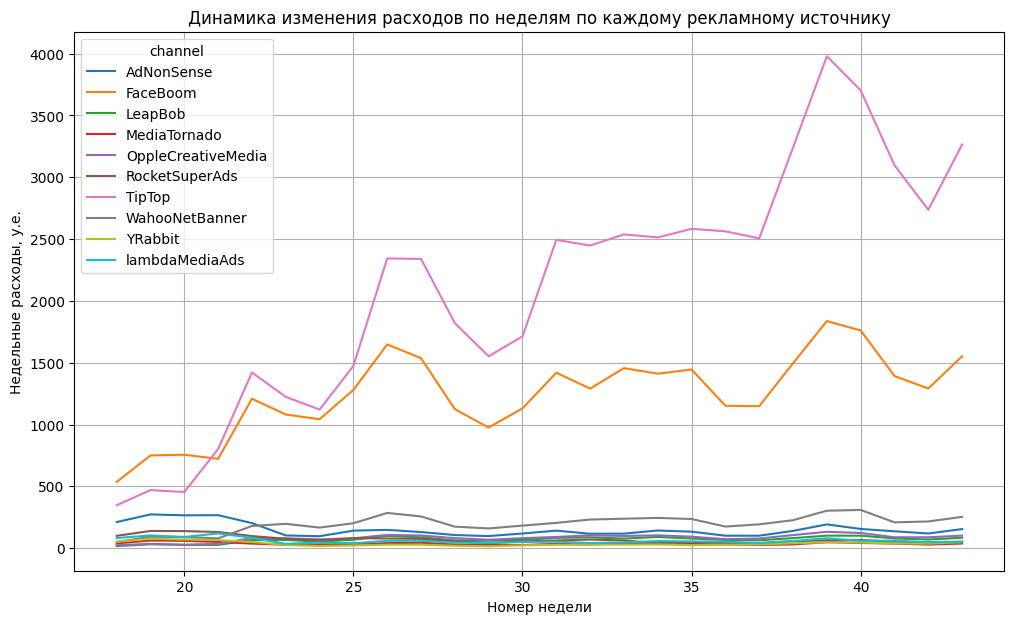

In [38]:
costs_week.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения расходов по неделям по каждому рекламному источнику')
plt.ylabel('Недельные расходы, у.е.')
plt.xlabel('Номер недели')
plt.show();

Мы видим, что для большинства источников, на первый взгляд, расходы остаются постоянными и сравнимыми на протяжении всего времени наблюдения. Правда, это может быть обманчивое впечатление из-за того, что для двух источников - TipTop и FaceBoom они довольно сильно растут. Расходы в неделю для этих каналов выросли от примерно 500 у.е. до 1500 у.е. и выше, тогда как на остальные каналы в неделю тратилось до 300 у.е.

Попробуем посмотреть на график без этих двух сильнорастущих рекламных каналов:

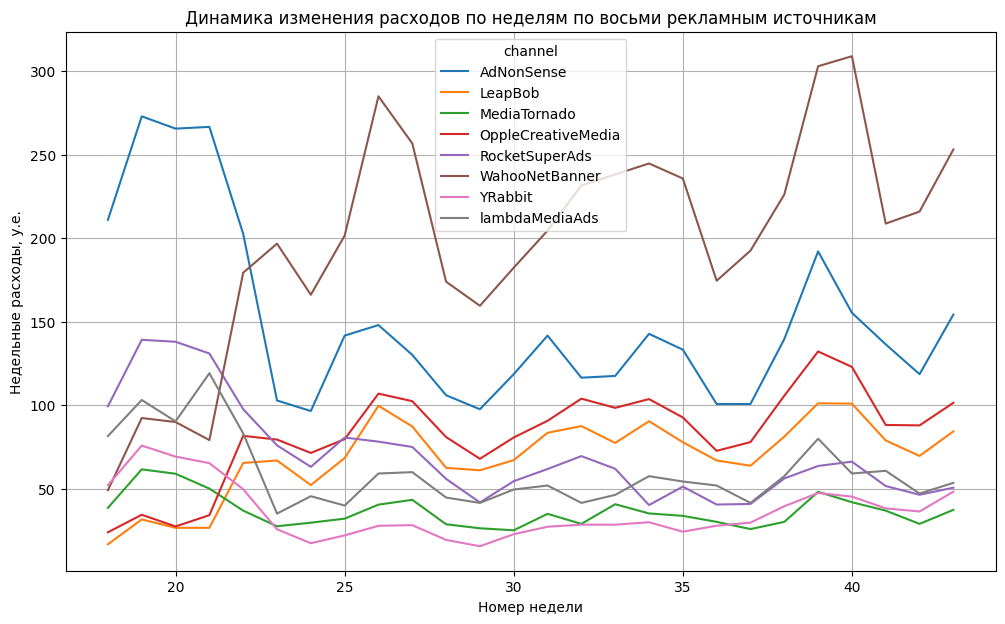

In [39]:
costs_week_2 = (costs
                .query('~((channel=="TipTop")|(channel=="FaceBoom"))')
                .pivot_table(index='week', values='costs', columns='channel', aggfunc='sum')
               )

costs_week_2.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения расходов по неделям по восьми рекламным источникам')
plt.ylabel('Недельные расходы, у.е.')
plt.xlabel('Номер недели')
plt.show();

Мы видим в таком масштабе, что и для остальных рекламных источников недельный расход мог довольно сильно меняться, в 2-3 раза. Можно заметить, что между 20 и 25 неделями произошел одномоментный скачок показателей - для одних каналов резкое повышение трат, для других - резкое снижение, и далее расходы колебались вокруг постоянного уровня.

Попробуем более точно определить дату резкого изменения расходов. Посмотрим на ежедневные изменения:

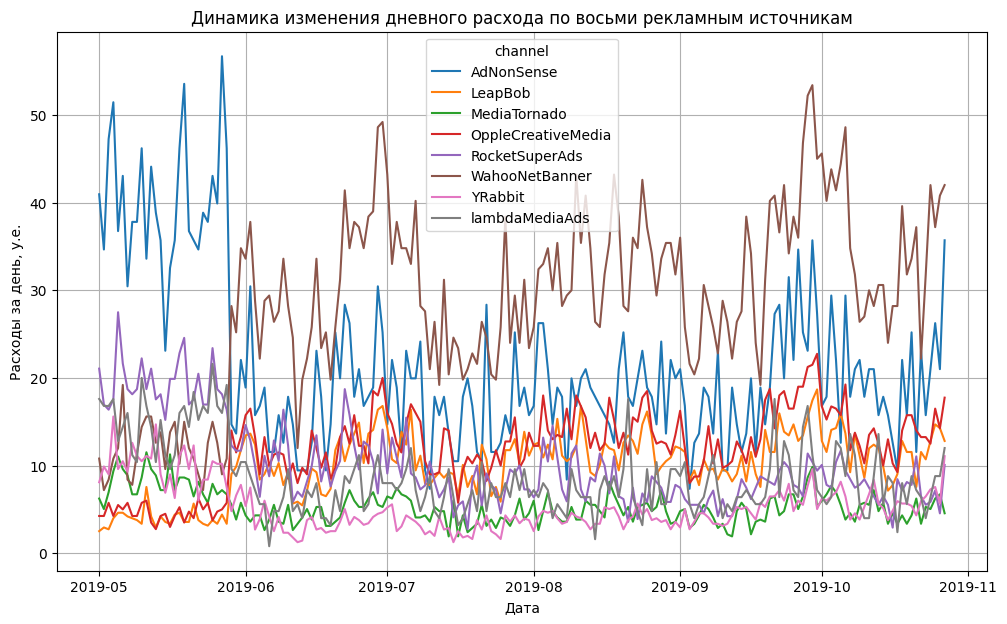

In [40]:
costs_date = (costs
                .query('~((channel=="TipTop")|(channel=="FaceBoom"))')
                .pivot_table(index='dt', values='costs', columns='channel', aggfunc='sum')
               )

costs_date.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения дневного расхода по восьми рекламным источникам')
plt.ylabel('Расходы за день, у.е.')
plt.xlabel('Дата')
plt.show();

В последнюю неделю мая был резкий скачок. Это 22 неделя. Отфильтруем данные по ней:

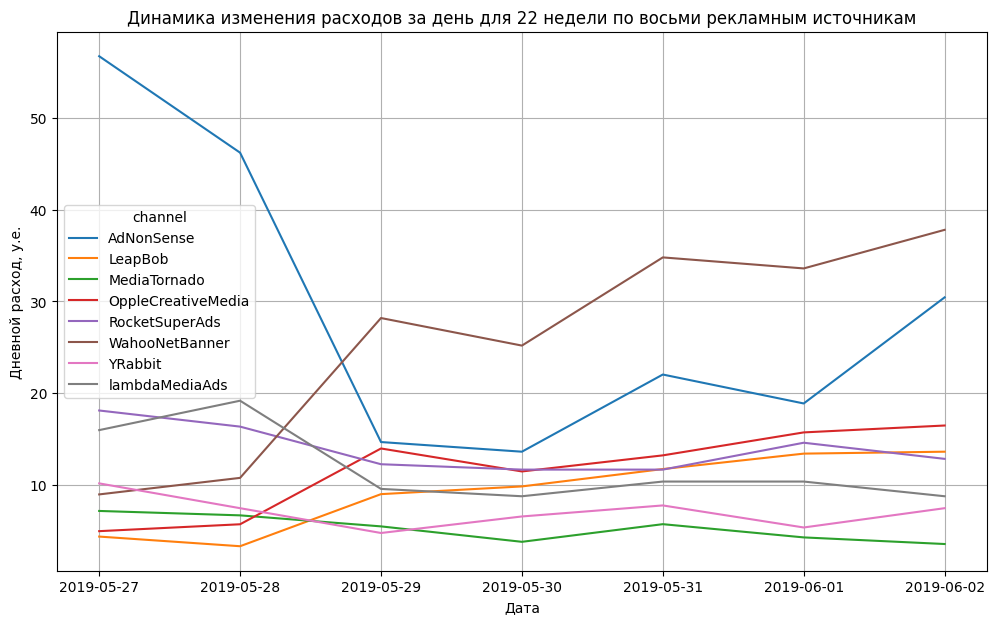

In [41]:
costs_22 = (costs
                .query('(~((channel=="TipTop")|(channel=="FaceBoom")))&(week==22)')
                .pivot_table(index='dt', values='costs', columns='channel', aggfunc='sum')
               )

costs_22.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения расходов за день для 22 недели по восьми рекламным источникам')
plt.ylabel('Дневной расход, у.е.')
plt.xlabel('Дата')
plt.show();

29 мая 2019 года произошло какое-то событие, из-за чего рекламные расходы резко изменились. Для одних каналов они снизились, для других - выросли. В следующих разделах мы посмотрим, с чем это может быть связано. Скажем, к примеру, если также резко изменилось число новых пользователей, это может объяснить пропорциональное изменение рекламных затрат.

Теперь посмотрим на те же данные в разрезе по месяцам, хотя, в принципе, понятно, что мы получим ту же историю (аналогичную недельной), просто более сглаженную:

In [42]:
# Добавляем столбец с номером месяца
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs_month = costs.pivot_table(index='month', values='costs', columns='channel', aggfunc='sum')
costs_month

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

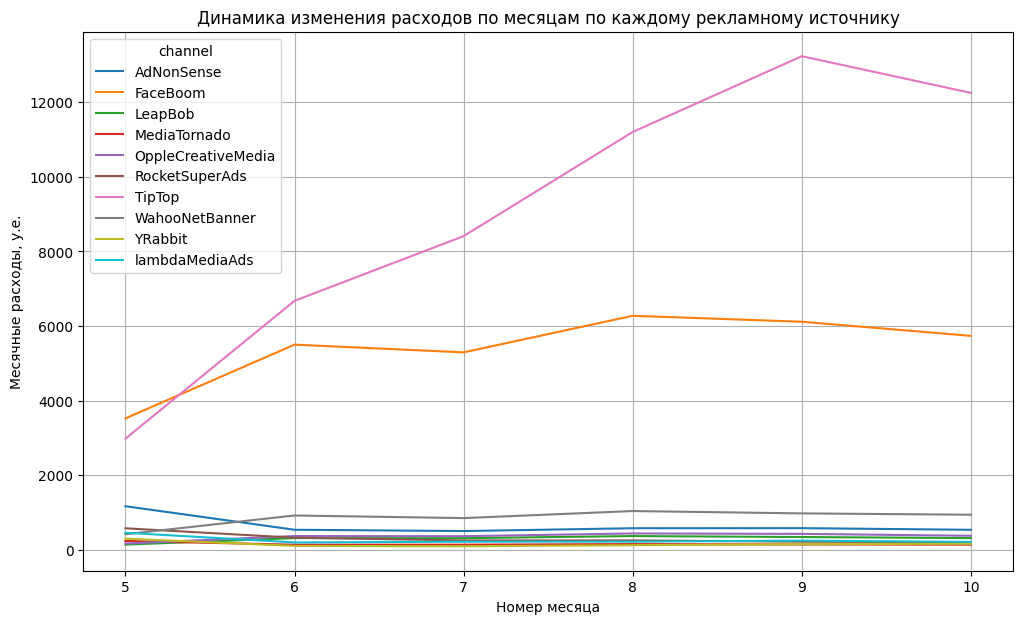

In [43]:
costs_month.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения расходов по месяцам по каждому рекламному источнику')
plt.ylabel('Месячные расходы, у.е.')
plt.xlabel('Номер месяца')
plt.show();

В мае на канал TipTop было потрачено 3000 у.е., а в октябре уже более 12000 у.е. Для канала FaceBoom - около 4000 у.е. в мае и около 6000 у.е. в октябре. На остальные рекламные источники траты составляли до 1000 у.е.

И давайте сразу посмотрим на число привлеченных клиентов через разные источники:

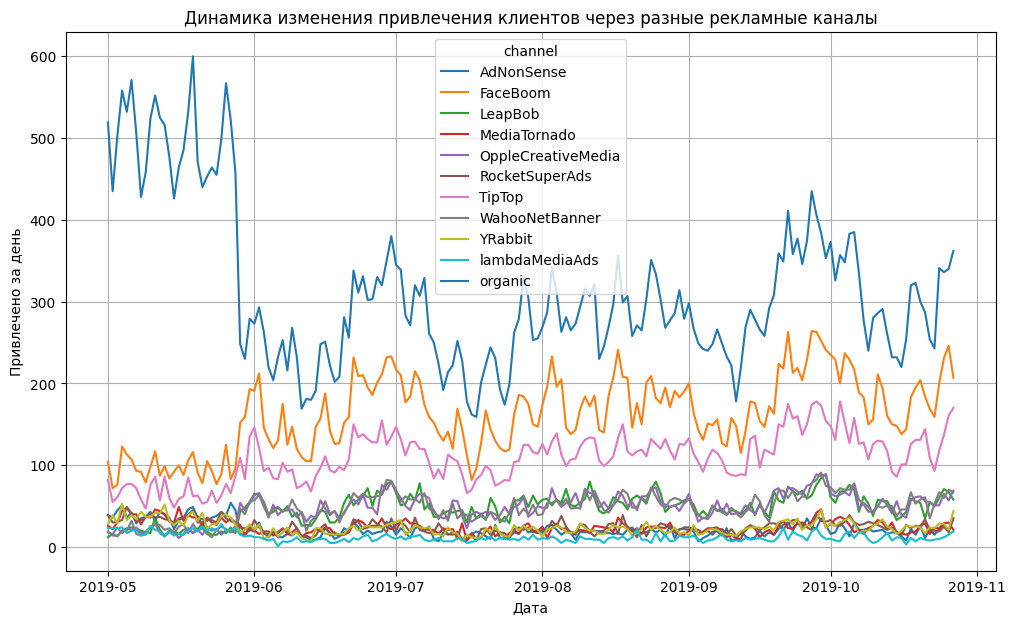

In [44]:
profiles_date = (profiles
                .pivot_table(index='dt', values='user_id', columns='channel', aggfunc='count')
               )
profiles_date.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения привлечения клиентов через разные рекламные каналы')
plt.ylabel('Привлечено за день')
plt.xlabel('Дата')
plt.show();

Видно, что число органических пользователей в конце мая 2019 года резко упало с уровня в 500 новых пользователей до примерно 250-ти, т.е. в два раза. Такое падение не похоже на обычные колебания и было вызвано какими-то непредвиденными обстоятельствами. Скорее всего речь идет о какой-то технической проблеме, возможно поисковая система поменяла алгоритмы выдачи. И опять речь идет о дате 29 мая 2019 года.

Чтобы лучше увидеть что творится внизу этого графика, уберем самые высокочастотные источники:

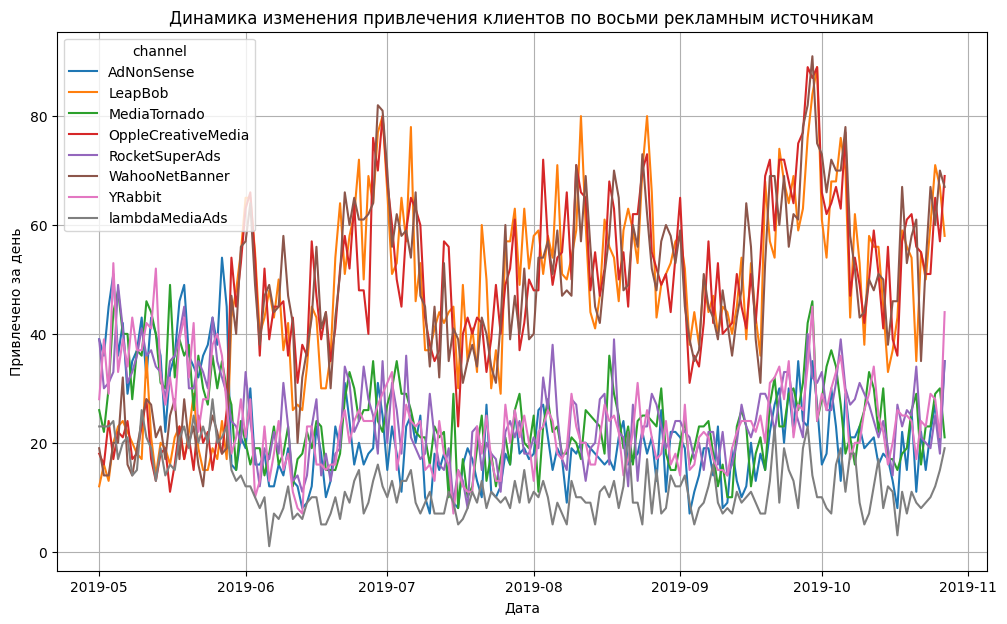

In [45]:
profiles_date_2 = (profiles
                .query('~((channel=="TipTop")|(channel=="FaceBoom")|(channel=="organic"))')
                .pivot_table(index='dt', values='user_id', columns='channel', aggfunc='count')
               )

profiles_date_2.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения привлечения клиентов по восьми рекламным источникам')
plt.ylabel('Привлечено за день')
plt.xlabel('Дата')
plt.show();

Здесь также на 29 мая 2019 года приходится резкое изменение числа зарегистрированных пользователей для большинства рекламных каналов. Выше мы уже видели резкое изменение трат на рекламу. Теперь понятно, что расходы на рекламу выросли (или упали) вслед за изменением числа пользователей.

Еще один момент вызывает интерес в полученном графике. Красная, оранжевая и коричневая линии ведут себя очень похоже - они практически синхронно идут вверх или вниз, да и абсолютные значения по привлеченным пользователям показывают одни и те же.

Уменьшим немного шума на графике, посмотрим на него в недельном разрезе:

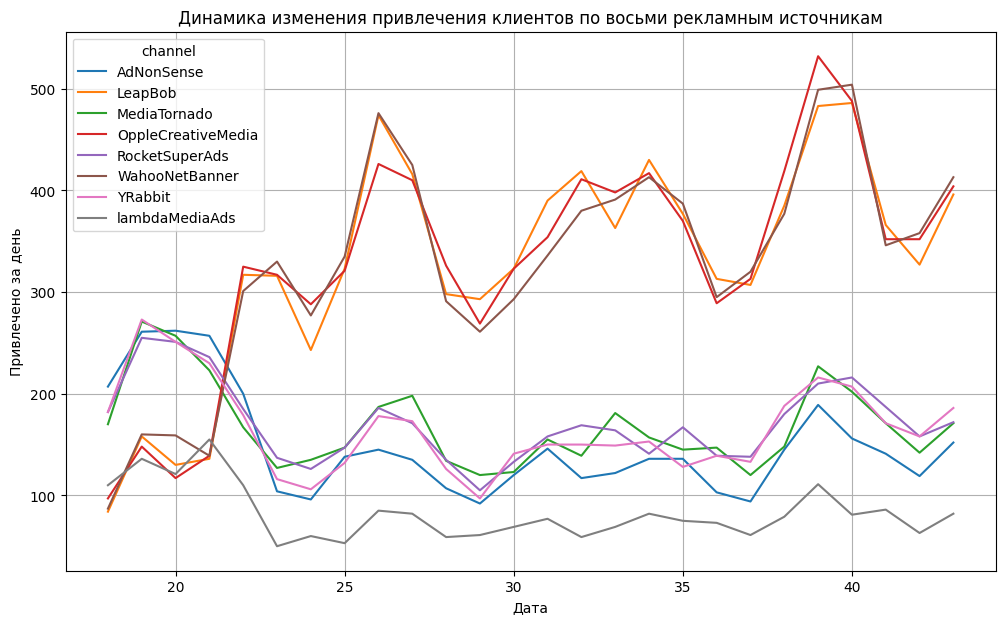

In [46]:
profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week

profiles_week = (profiles
                .query('~((channel=="TipTop")|(channel=="FaceBoom")|(channel=="organic"))')
                .pivot_table(index='week', values='user_id', columns='channel', aggfunc='count')
               )

profiles_week.plot(grid=True, figsize=(12, 7))
plt.title('Динамика изменения привлечения клиентов по восьми рекламным источникам')
plt.ylabel('Привлечено за день')
plt.xlabel('Дата')
plt.show();

Здесь мы лучше видим практически синхронную работу разных рекламных каналов. Причем теперь видны две такие группы. Красная, оранжевая и коричневая линии - каналы OppleCreativeMedia, LeapBob и WahooNetBanner. И вторая группа: зеленая, фиолетовая и розовая линии - каналы MediaTornado, RocketSuperAds и YRabbit.

Здесь, наверно, уместно задаться вопросом: исходные данные для нашего проекта - это реальные данные, собранные в результате деятельности "живой" компании? Или это искусственно сгенерированные данные? Если это сгенерированные данные, то синхронные показания (с небольшими отклонениями) разных каналов не должны вызывать вопросов. Но нам гораздо интереснее реальный подход.И такой подход мы и исповедуем в нашем проекте. А значит нужно найти ответ на вопрос, когда такая ситуация возможна в реальной жизни? Ну, например, когда эти рекламные каналы действуют на одной и той же площадке. Т.е. они конкурируют за одну и ту же аудиторию и фактически "делят" ее между собой на три равные части. (Честно говоря, я понятия не имею, как устроен рекламный рынок, и руководствуюсь исключительно логикой, и могу, конечно, здесь сильно ошибаться). Соответственно, возникает идея оставить только один канал, у которого разница между ценностью клиента и затратами на его привлечение будет максимальной. Ниже попробуем рассмотреть эти характеристики более подробно.

Да, отметим также, что среднее число привлекаемых пользователей первой тройки находится в районе 300-350 человек в неделю, тогда как пиковое значение достигает 500 человек (в 1,5 раза больше). То же самое и для второй тройки каналов, в среднем 150 человек, максимум - в районе 250.

#### Средняя стоимость привлечения пользователя (CAC)

Теперь посчитаем, сколько в среднем стоило привлечение одного пользователя (САС) из каждого источника. Для этого используем уже готовую таблицу profiles:

In [47]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  week  
0  2019-05-07 2019-05-01   True          1.088172    19  
1  2019-07-09 2019-07-01  False          1.107237    28  
2  2019-10-01 2019-10-01  False          0.000000    40  
3  2019-08-22 2019-08-01  False          0.988235    34  
4  2019-10-02 2019-10-01  False          0.230769    40

Нужно сгруппировать данные по каналам привлечения и посчитать среднее из столбца acquisition_cost:

In [48]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
)
cac.round(2)

cac
channel                 
TipTop              2.80
FaceBoom            1.11
AdNonSense          1.01
lambdaMediaAds      0.72
WahooNetBanner      0.60
RocketSuperAds      0.41
OppleCreativeMedia  0.25
YRabbit             0.22
MediaTornado        0.22
LeapBob             0.21
organic             0.00

Источники TipTop, FaceBoom и AdNonSense здесь выделяются не в лучшую сторону, показывая максимальные средние затраты на привлечение одного пользователя. На последнем месте закономерно обосновался органический источник с нулевыми затратами на привлечение.

**Промежуточные выводы**

Общая сумма расходов на маркетинг за период с 1 мая 2019 года по 27 октября 2019 года составила 105 тысяч 497,3 у.е. Траты между каналами распределены очень неравномерно. Дороже других компании обошелся рекламный канал TipTop - 54751,3 у.е. Следом идет FaceBoom - 32445,6 у.е. Остальные каналы более чем в 10 раз отстают от лидера по затратам.
Были построены графики динамики изменения расходов (по неделям и месяцам) во времени по каждому источнику привлечения. Самый сильный рост затрат был зафиксирован для каналов TipTop и FaceBoom. Остальные каналы на фоне этих двух выглядят стабильными в плане затрат. Но при увеличении масштаба можно увидеть, что, например, недельный расход мог измениться в 2-3 раза. 29 мая 2019 года произошло резкое изменение расходов по всем рекламным источникам в большую или меньшую сторону.

Если мы посмотрим как менялось число клиентов, привлеченных разными каналами, то также увидим резкое изменение для всех каналов. Особый интерес здесь представляет снижение в 2 раза ежедневного числа органических пользователей. Вероятно, это могло произойти в результате какой-то технической проблемы. Остается добавить здесь, что скачок затрат на рекламу произошел по причине скачка числа пользователей.

Была посчитана средняя стоимость привлечения одного пользователя (САС) для каждого источника. Дороже всего компании обошлись пользователи из канала TipTop - 2,8 у.е. FaceBoom привлечкал клиентов в среднем за 1,11 у.е., AdNonSense  - за 1,01 у.е. Самый доступный платный канал среди представленных - LeapBob со стоимостью 0,21 у.е. за одного пользователя.

### Оценка окупаемости рекламы

#### Графики LTV, ROI и CAC для среднего пользователя

Исключим органических пользователей из таблицы профилей. Нам нужно оценить окупаемость рекламы и органические пользователи (которые совершали покупки) возможно будут довольно сильно "улучшать" рассматриваемые показатели. Поэтому лучше полностью исключить их влияние.

In [49]:
profiles_inorganic = profiles.query('channel!="organic"')

In [50]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

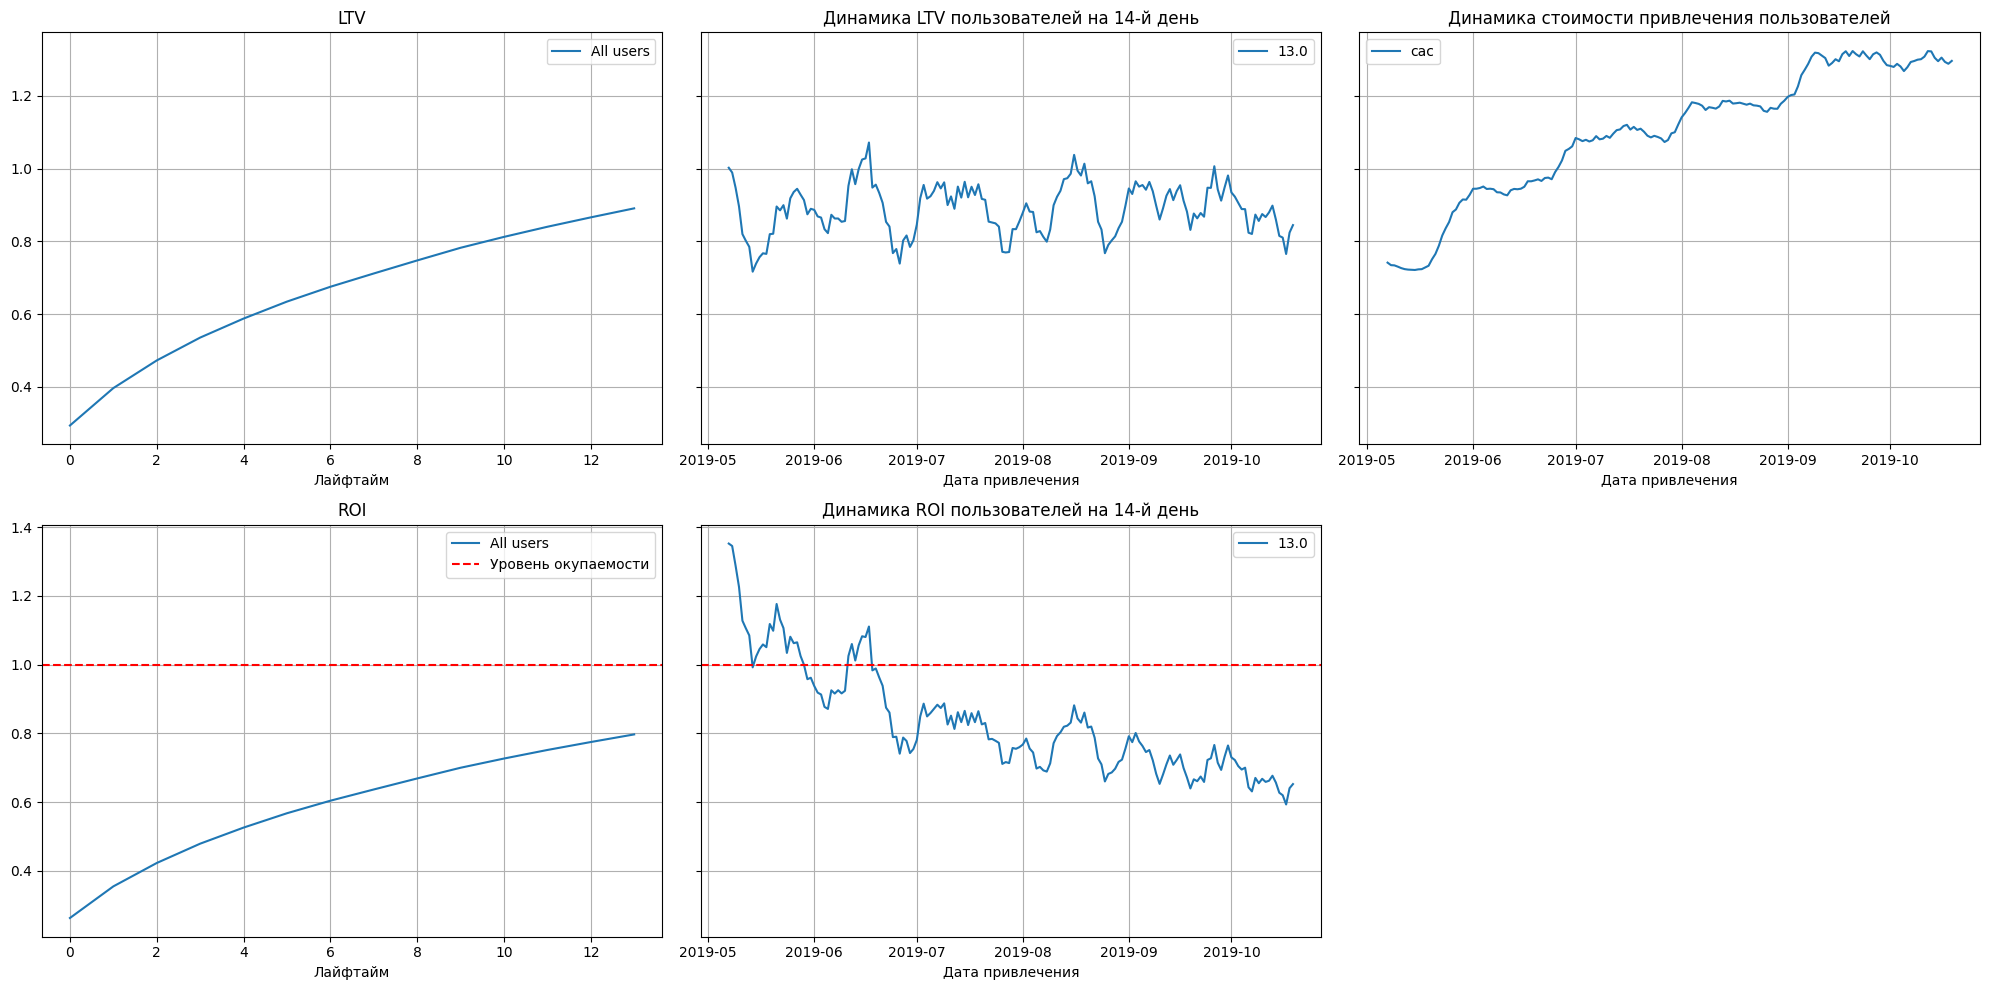

In [51]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_inorganic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из полученных графиков можно сделать следующие выводы:
* средняя ценность одного пользователя во всех когортах к концу второй недели достигает примерно уровня 0,9 у.е.;
* пользователи разных когорт к 14-му дню имеют примерно одинаковую ценность на всем временном интервале;
* стоимость привлечения пользователей практически постоянно растет. Она не превышает среднюю ценность пользователя (0,9 у.е.) только в первый месяц наблюдения;
* усредненное по всем когортам ROI не достигает уровня окупаемости к 14 дню лайфтайма клиента и останавливается в районе отметки 80% окупаемости;
* только когорты первого месяца рассматриваемого интервала и середины второго месяца достигали уровня окупаемости. Уровень окупаемости более поздних когорт в среднем постоянно снижался.

#### Конверсия пользователей и ее динамика

In [52]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_inorganic, orders, observation_date, horizon_days
)

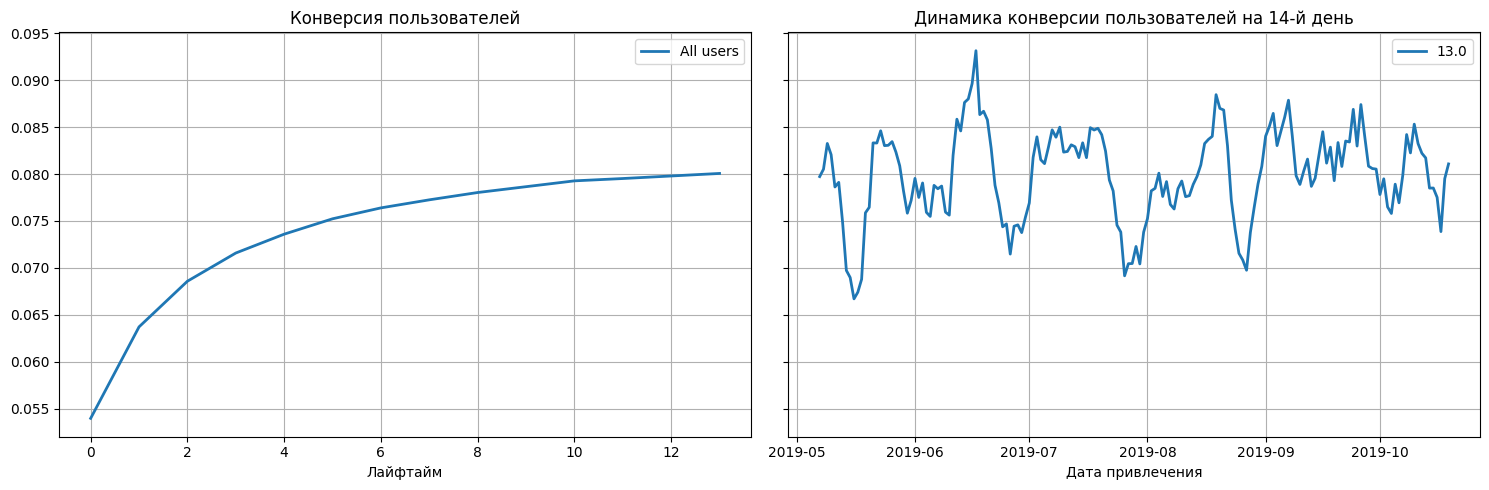

In [53]:
plot_conversion(conversion, conversion_history, horizon_days)

Мы видим, что за две недели конверсия пользователей в среднем вырастает с 5,5% до 8%. Если говорить об отдельных когортах, то в целом конверсия остается примерно на одном уровне, меняясь на 1% в большую или меньшую сторону вокруг средней отметки в 8%.

#### Удержание пользователей

In [54]:
retention_raw, retention, retention_history = get_retention(
    profiles_inorganic, visits, observation_date, horizon_days
)

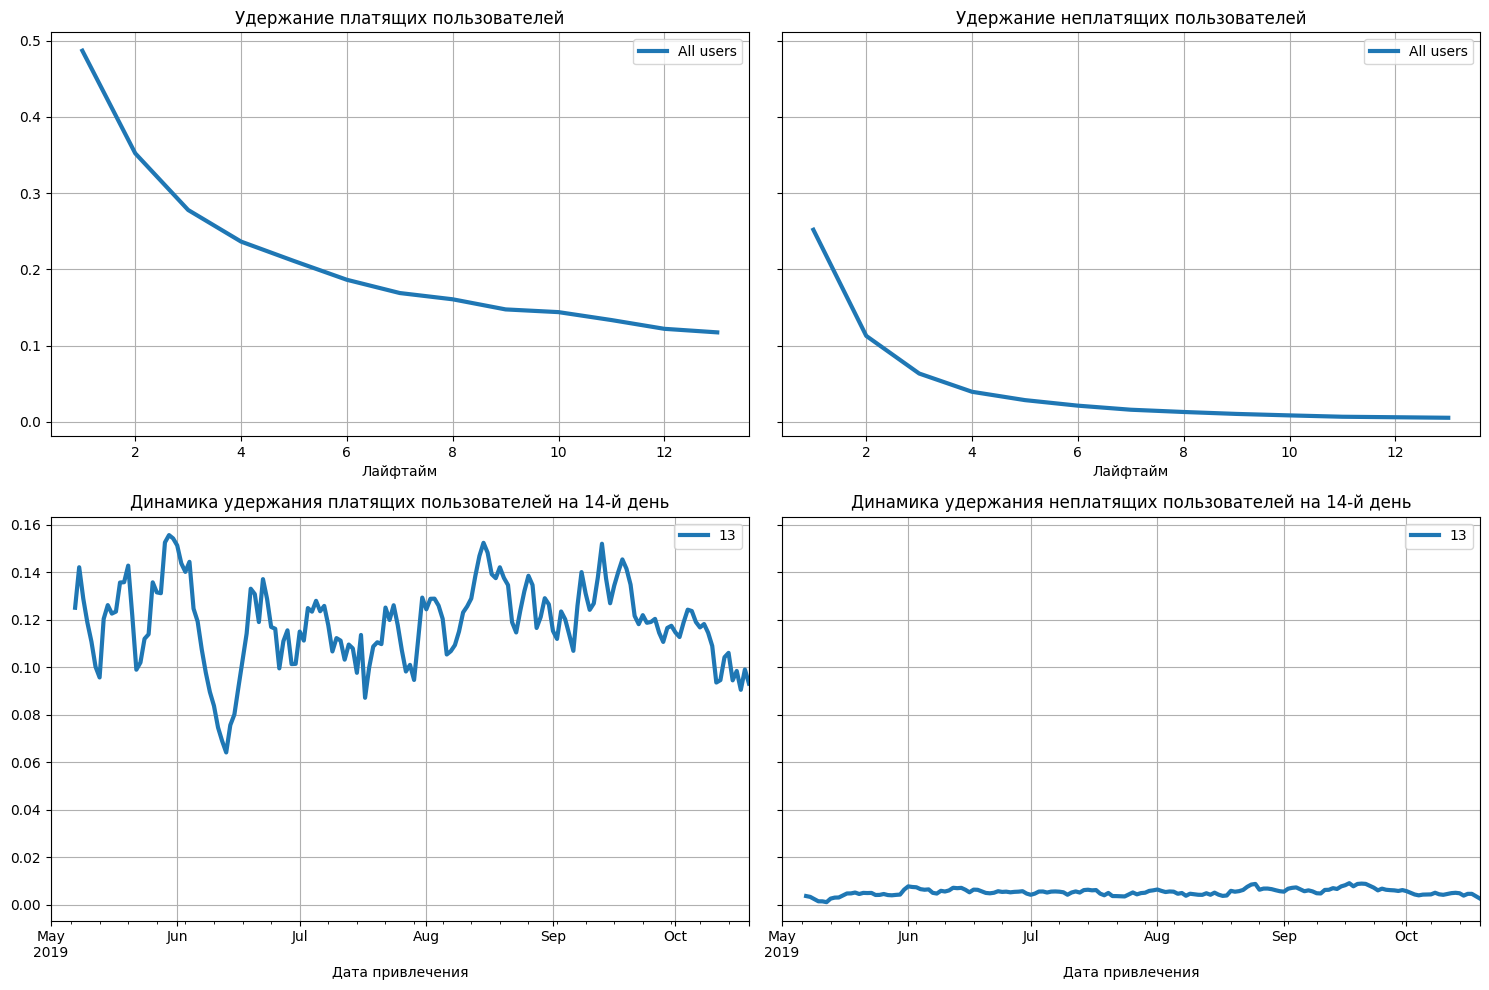

In [55]:
plot_retention(retention, retention_history, horizon_days) 

Из графиков видно, что через день после регистрации удержание платящих пользователей составляет около 50%, а к концу второй недели только 12%. Для неплатящих пользователей эти показатели меняются от 25% вначале, до почти нуля через 14 дней.

#### Окупаемость рекламы с разбивкой по устройствам

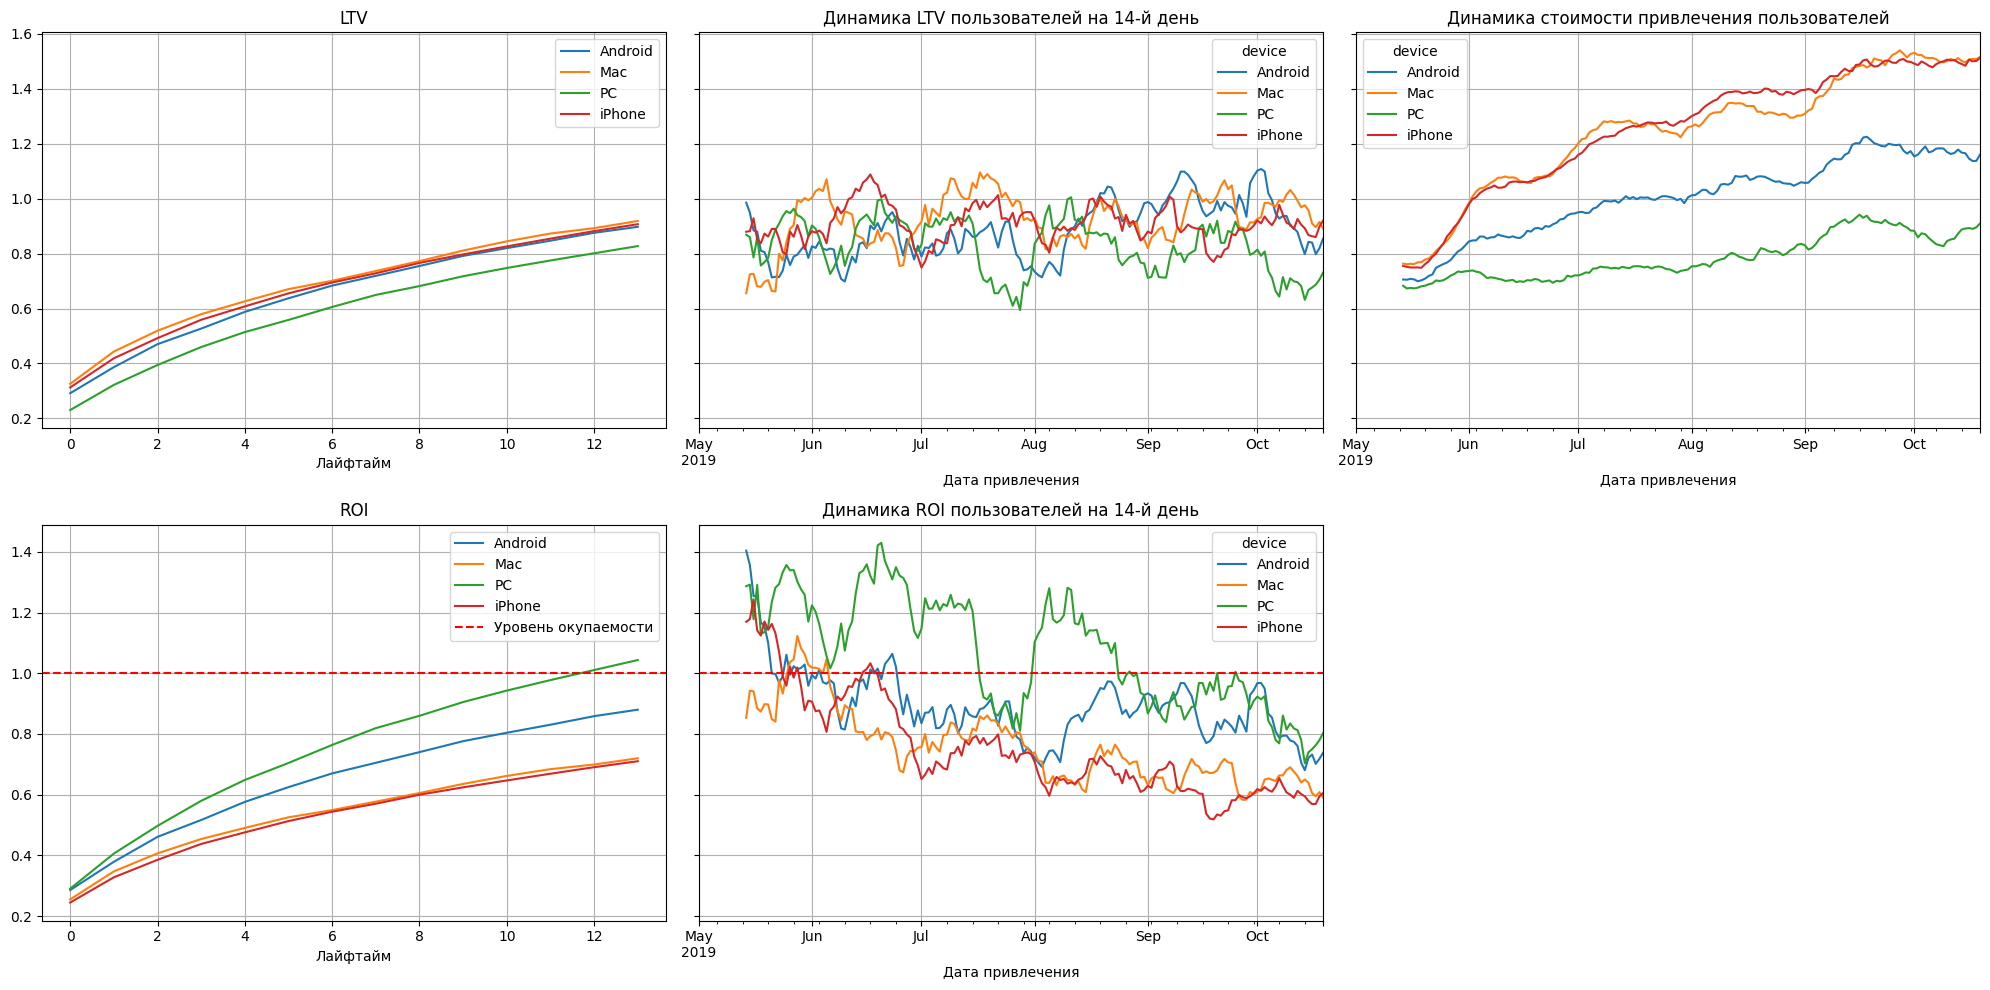

In [56]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_inorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы видим из полученных графиков, что:
* ценность среднего пользователя PC несколько ниже ценности пользователей других устройств, причем это выполняется для всех лайфтаймов среднего пользователя PC;
* а вот стоимость привлечения пользователей PC находится на самом низком уровне и очень мало растет за рассматриваемый период времени. Привлечение пользователей Android вначале стоило почти столько же, сколько у клиентов с PC, но в конце интервала стоило уже существенно выше. Для пользователей Mac и iPhone картина еще более контрастная - у них самый сильный рост затрат на привлечение;
* в итоге, уровень окупаемости к концу второй недели смогли преодолеть только пользователи PC, несмотря на более низкую ценность по сравнению с другими пользователями;
* динамика ROI также указывает на проблемы с окупаемостью. Только пользователям PC удается превышать уровень окупаемости примерно первые 4 месяца (за исключением когорт второй половины июля), но затем, с ростом затрат на привлечение и они уходят в минус.

Проверим конверсию и удержание с разбивкой по устройствам:

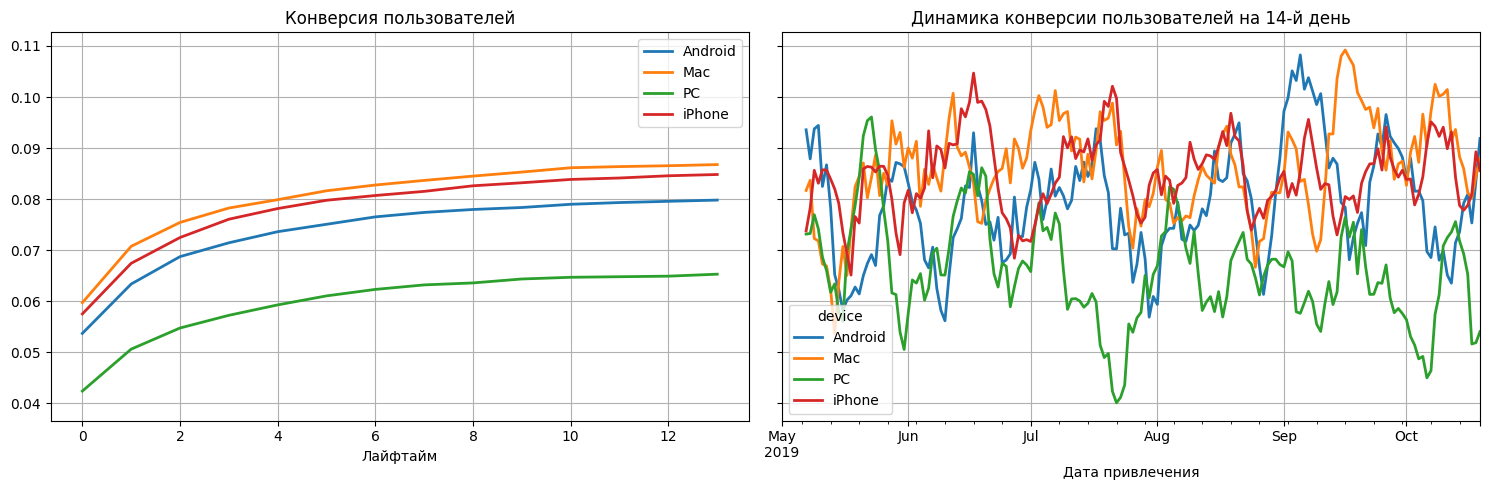

In [57]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_inorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

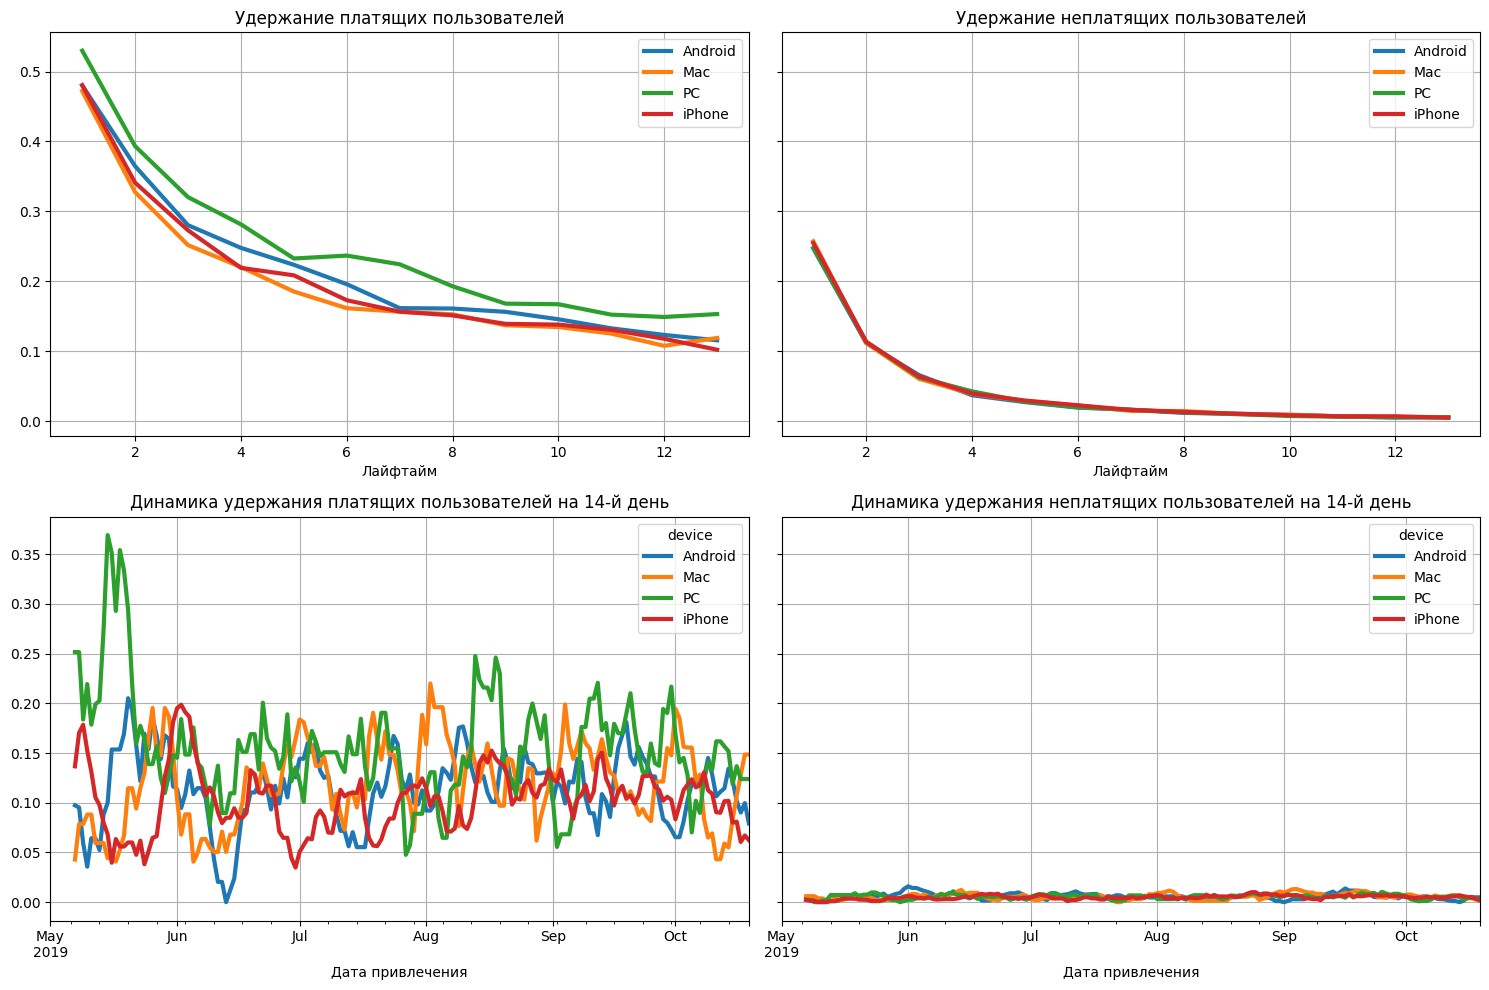

In [58]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_inorganic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Мы получили, что:
* конверсия пользователей PC сильно уступает конверсии пользователей с другими устройствами. За две недели она достигает отметки 6,5%, тогда как для остальных устройств конверсия больше 8%;
* в динамике конверсия для разных когорт менялась в достаточно широком диапазоне - от 4% для пользователей PC до 11% для пользователей Mac, но в среднем оставалась примерно на одном уровне;
* удержание платящих пользователей PC несколько выше, чем у пользователей с другими устройствами. Через две недели оно выходит примерно на уровень 15%, тогда как для других устройств это в среднем 11%;
* на графике динамики удержания для пользователей PC мы видим интересный вспеск для когорт середины мая до уровня более 35%.

#### Окупаемость рекламы с разбивкой по странам

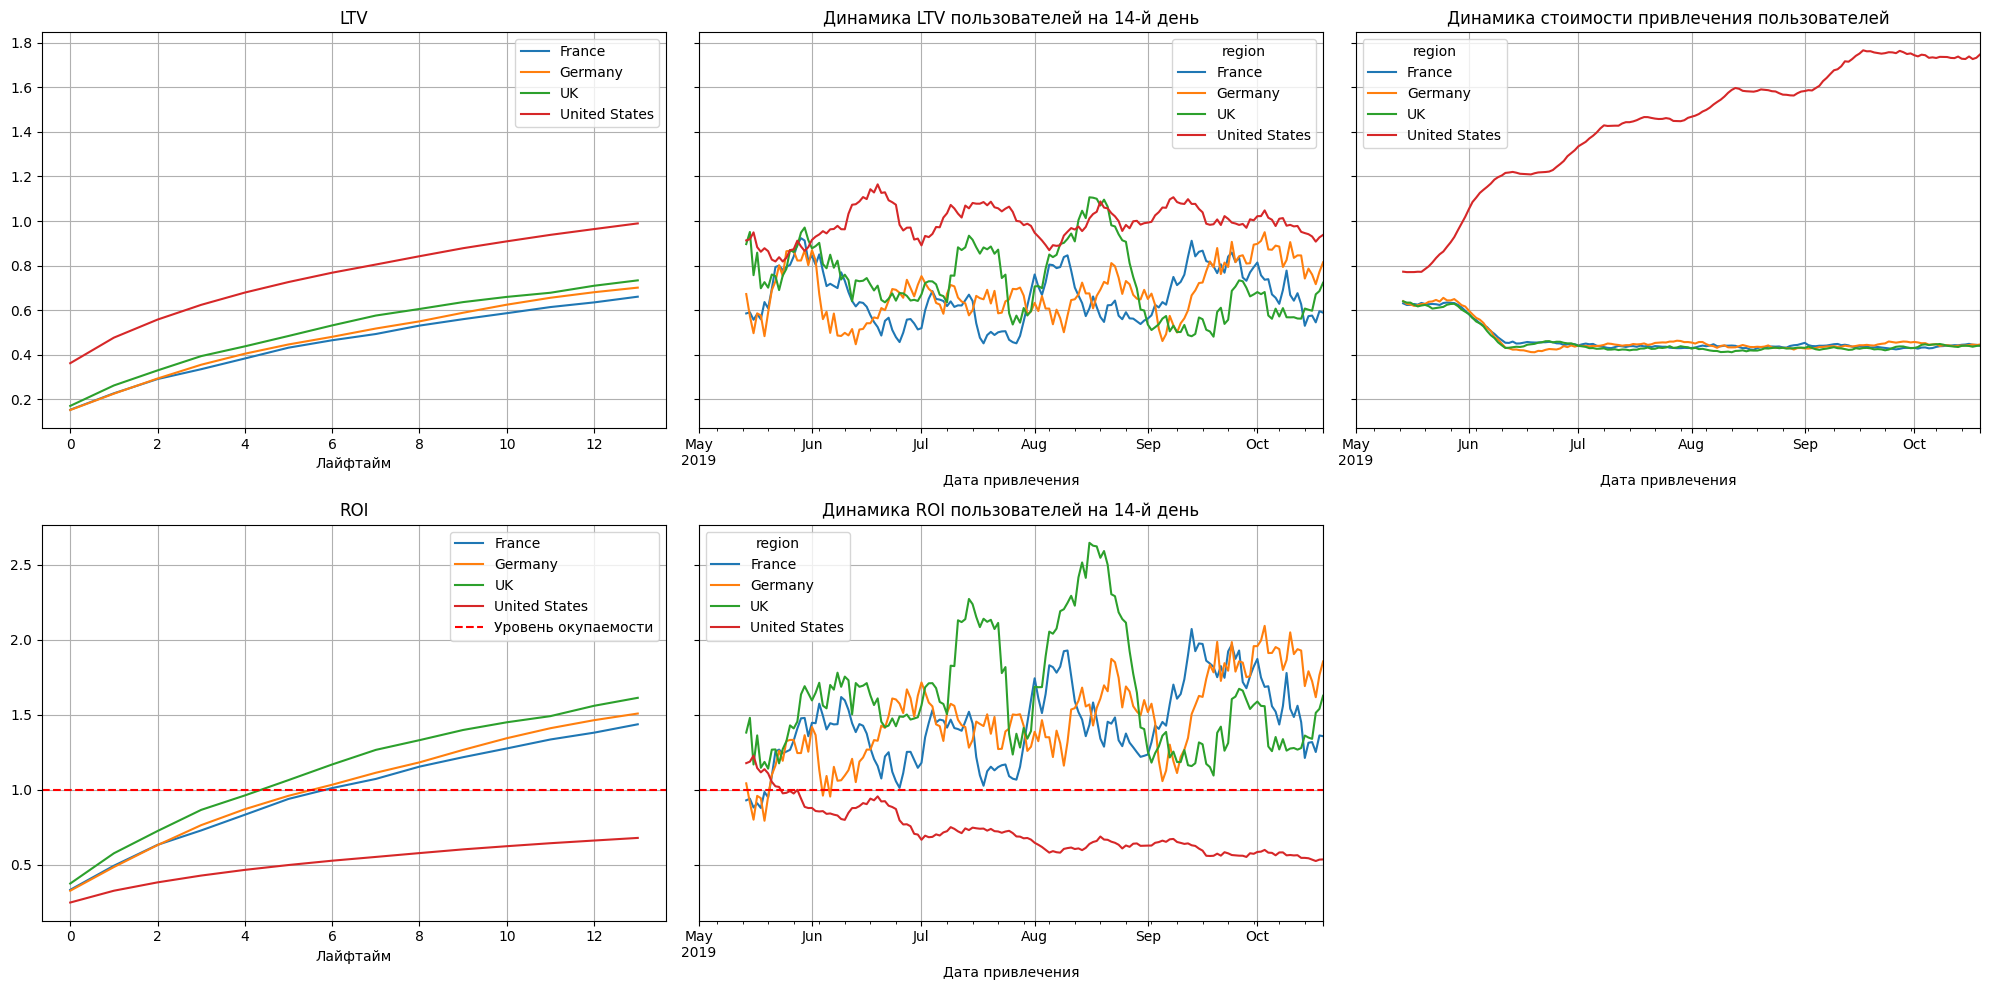

In [59]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_inorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы получили, что:
* из 4-х стран наибольшую ценность представляют пользователи из США. Средний пользователь из США в первый день приносит в 2 раза больше (0,4 у.е. против 0,2 у.е.), а в 14-й день примерно в 1,5 раза (1 у.е. против 0,7 у.е.) чем клиенты из других стран;
* но, стоимость привлечения пользователей из США практически с самого начала начинает расти угрожающими темпами. Причем, довольно сильное повышение стоимости происходит с периодичностью примерно раз в месяц. В то же время, рекламные затраты на пользователей других стран через месяц ощутимо снижаются;
* как следствие повышения затрат, ROI клиентов из США доходит только где-то до 70%, тогда как пользователи из Франции, Германии и Великобритании уверенно преодолевают порог уровня окупаемости;
* динамика ROI пользователей из США также показывает снижение доходов и опускается со 100% до 50%.

* на графике динамики ROI мы видим выраженные пики для когорт середины июля и августа пользователей из Великобритании.

Также, интересно посмотреть на конверсию и удержание пользователей с разбивкой по странам:

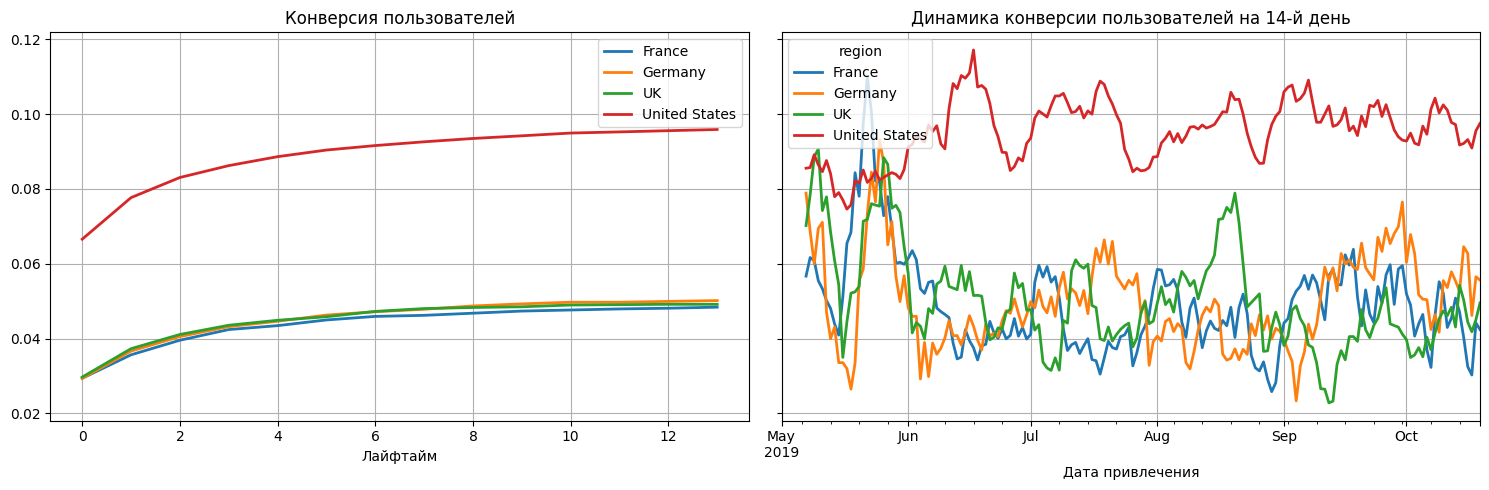

In [60]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_inorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

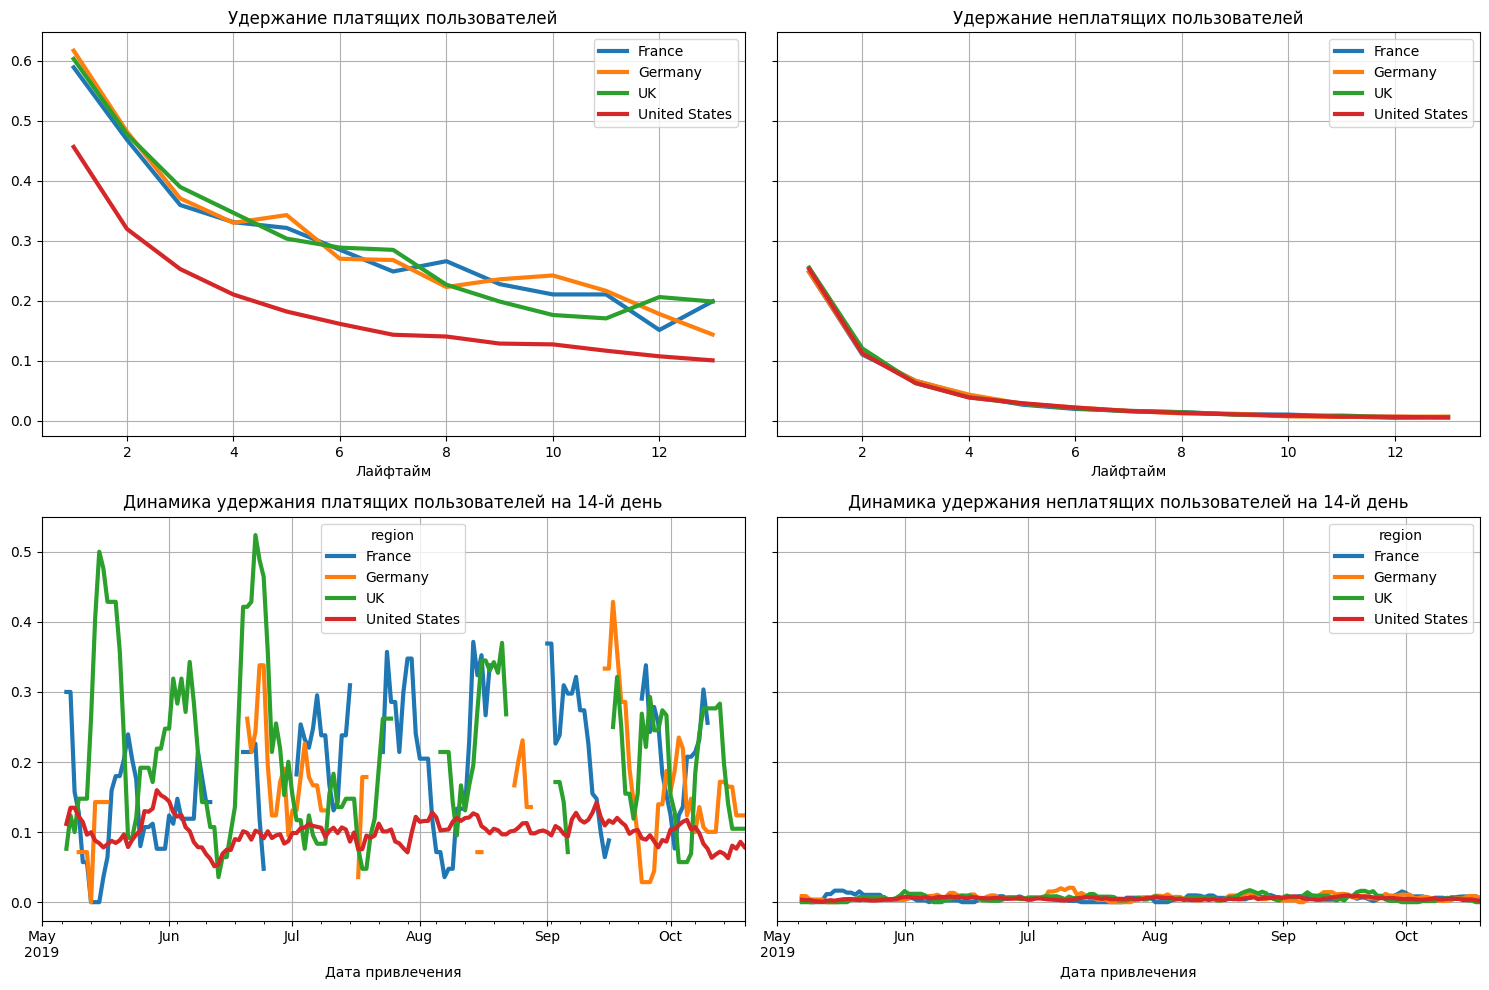

In [61]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_inorganic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Мы видим, что пользователи из США привлекаются практически в два раза лучше клиентов из других стран, но при этом удерживаются хуже. Т.е. что технически здесь происходит? Мы помним, что наша функция для расчета конверсии считает долю пользователей, сделавших первую покупку в течение первых двух недель. Клиенты из США довольно охотно (по сравнению с Европой) совершают первую покупку. При этом они плохо удерживаются, т.е. сделав первую покупку, они практически больше не возвращаются в приложение. С чем связано такое поведение пользователей мы не знаем. Возможно, их ожидания, возникшие при просмотре рекламных материалов, не оправдались, когда они воспользовались нашим приложением. И мы ясно видим их разочарование на графике удержания. 

Другой причиной низкого удержания может быть какая-то техническая проблема.

На графике динамики конверсии мы видим падение конверсии для европейских когорт середины мая, далее резкий рост к 20-м числам мая и новое падение к началу июня.

#### Окупаемость рекламы с разбивкой по рекламным каналам

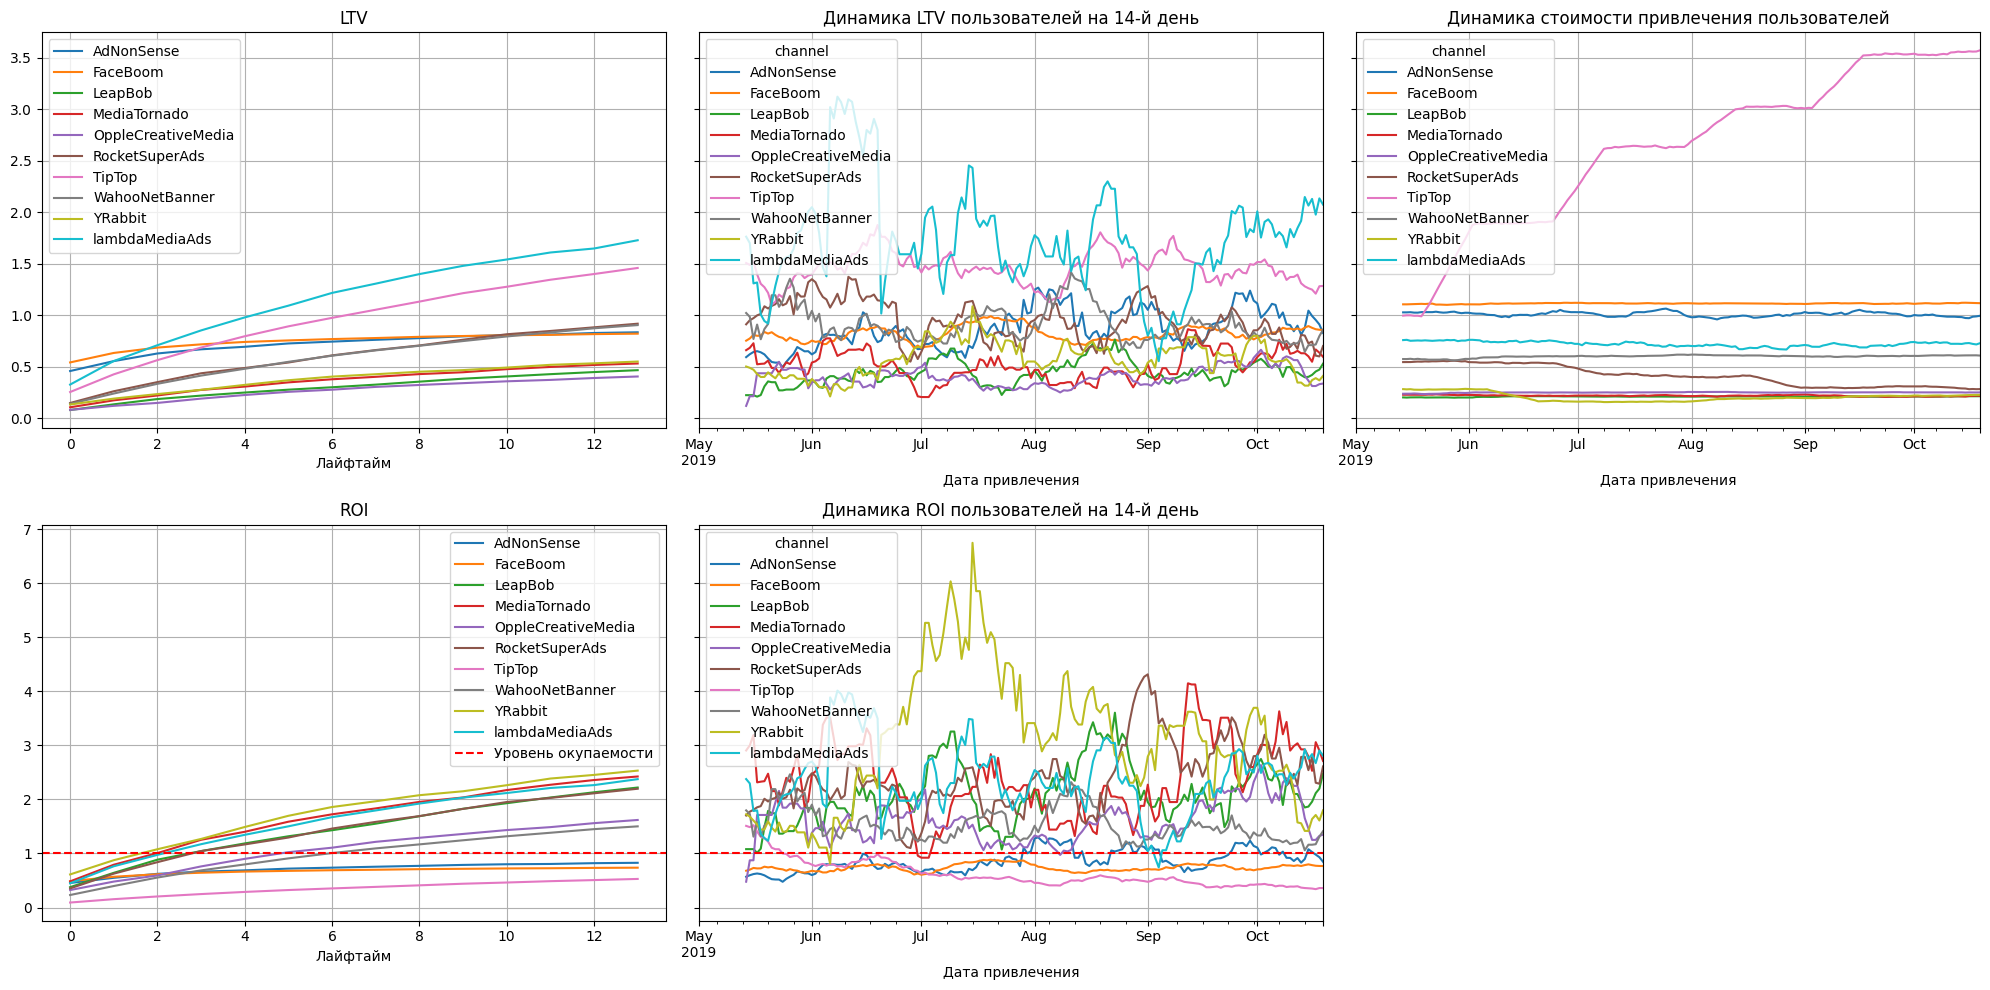

In [62]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_inorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Визуализация метрик с разбивкой по рекламным каналам показывает:
* более высокую ценность и ее рост к 14-му дню лайфтайма показывают пользователи, привлеченные каналами lambdaMediaAds и TipTop. Их ценность за 2 недели вырастает примерно в 4 раза. А вот клиенты из источников AdNonSense и FaceBoom практически не совершают повторных покупок и их ценность практически не меняется;
* рекламный источник TipTop показывает очень сильный рост затрат на временном интервале, в то время как остальные источники более-менее сохраняют стоимость привлечения на постоянном уровне, либо даже демонстрируют тенденцию к снижению как канал RocketSuperAds. Выше, когда мы рассматривали динамику недельных расходов по рекламным каналам, сильный рост показывал также канал FaceBoom. Но здесь мы видим, что в пересчете на одного пользователя, расход остается постоянным, а значит, в данном случае речь идет о пропорциональном (росту расходов) увеличении числа клиентов;
* три рекламных источника не достигли уровня окупаемости, это уже упоминавшиеся выше AdNonSense, FaceBoom и TipTop. Последний из них, мы уже выяснили, показывает слишком сильный рост по стоимости привлечения пользователей. А вот AdNonSense и FaceBoom, похоже, просто имеют слишком высокую стоимость привлечения в районе 1 у.е. или чуть выше. При средней "ценности" пользователя 0,9 у.е., стоимость привлечения клиентов через эти каналы нужно снижать.

* на графике динамики ROI мы видим сильный всплеск для когорт середины июля канала YRabbit.

Мы посмотрели метрики по разным каналам без органических пользователей. Теперь посмотрим быстро только по ним и еще добавим один платный канал, чтобы функция работала без ошибок:

In [63]:
profiles_organic = profiles.query('((channel=="organic")|(channel=="AdNonSense"))')

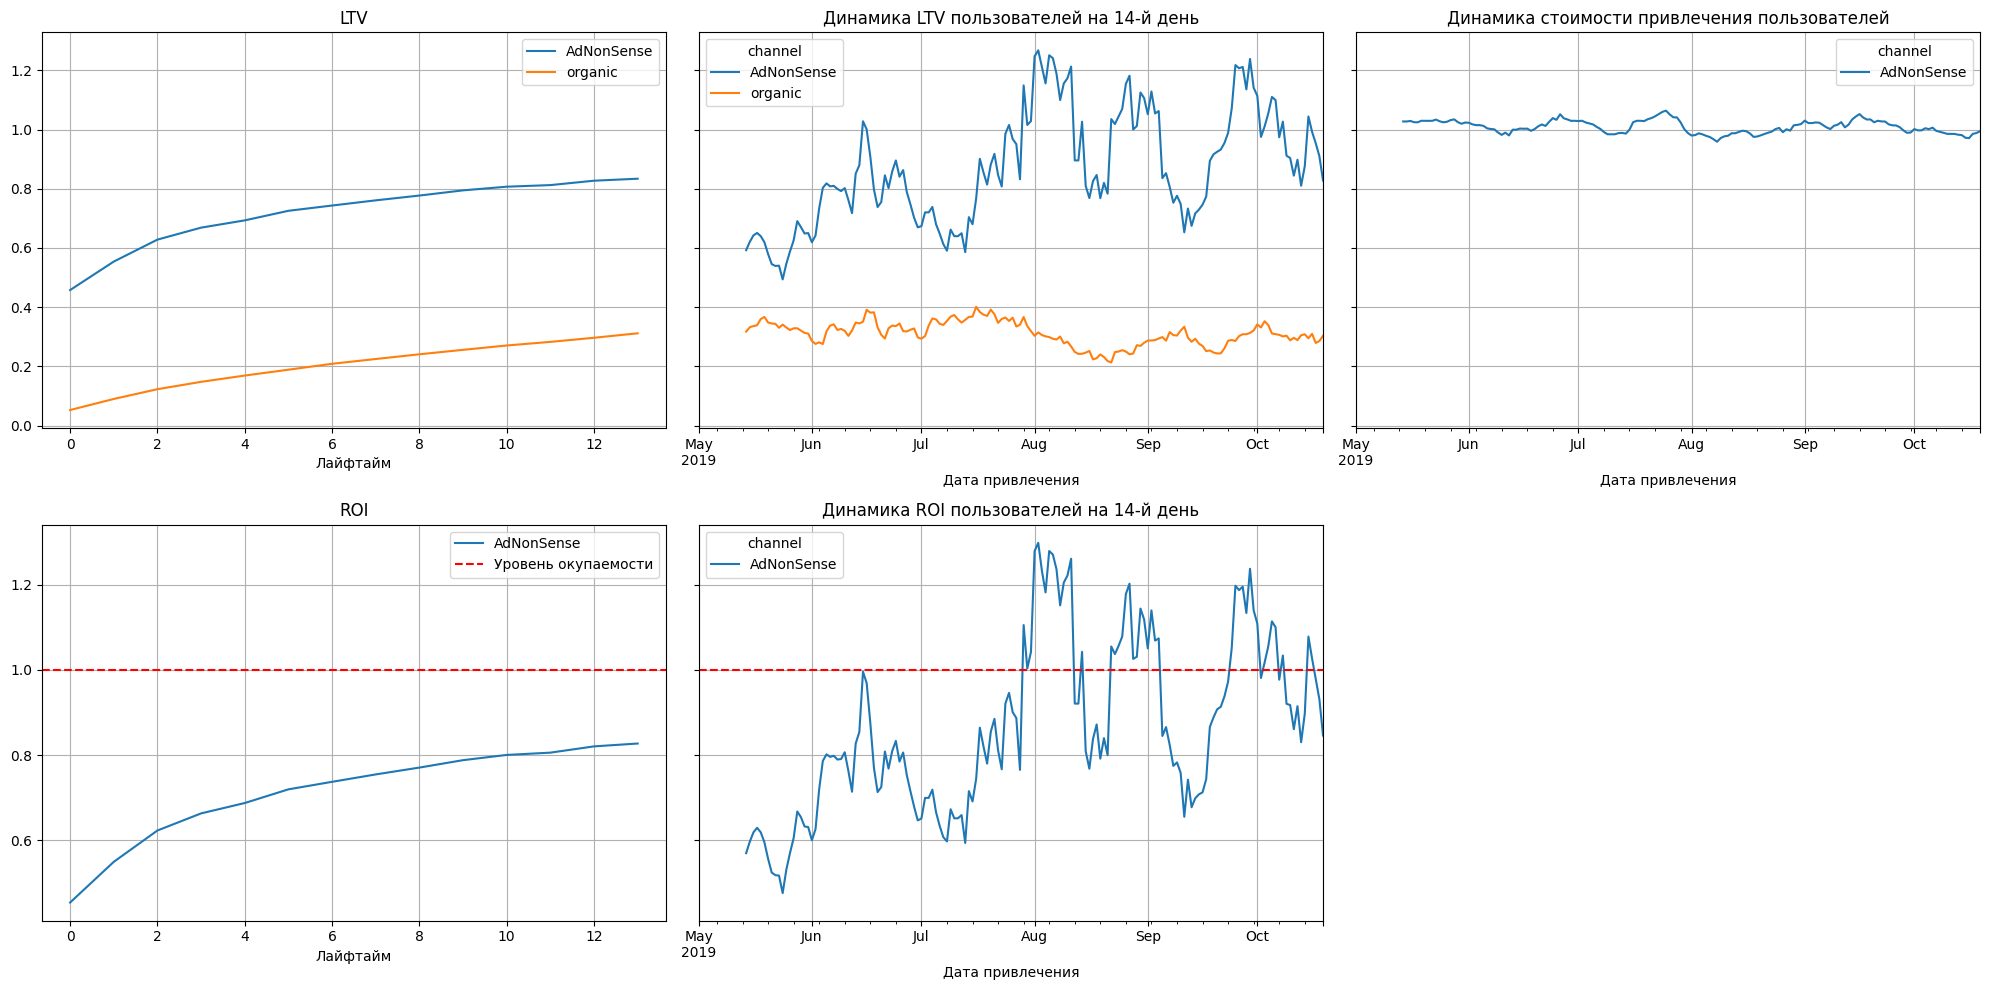

In [64]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Да, мы видим, что органические пользователи имеют самую низкую ценность. К концу второй недели она достигает 0,3 у.е. И если посмотреть на динамику этого показателя на втором графике, то мы увидим, что все когорты органических клиентов демонстрируют примерно такую же ценность на всем рассматриваемом промежутке времени. Но здесь два момента. Во-первых, эти пользователи достались нам "бесплатно", а значит любой такой клиент ценен для нашей компании. Во-вторых, число органических пользователей резко упало 29 мая со среднего уровня 500 человек до 250 человек, а значит компания стала терять на ровном месте примерно 250 х 0,3 = 75 у.е. ежедневно.

#### Графики LTV, ROI и CAC без США

Выше было получено, что расходы на привлечение среднего пользователя из США сильно растут. Попробуем исключить США из таблицы профилей и посмотреть на общие метрики, оставив только пользователей из Европы:

In [65]:
profiles_europe = profiles_inorganic.query('region!="United States"')

Посмотрим на окупаемость рекламы в Европе:

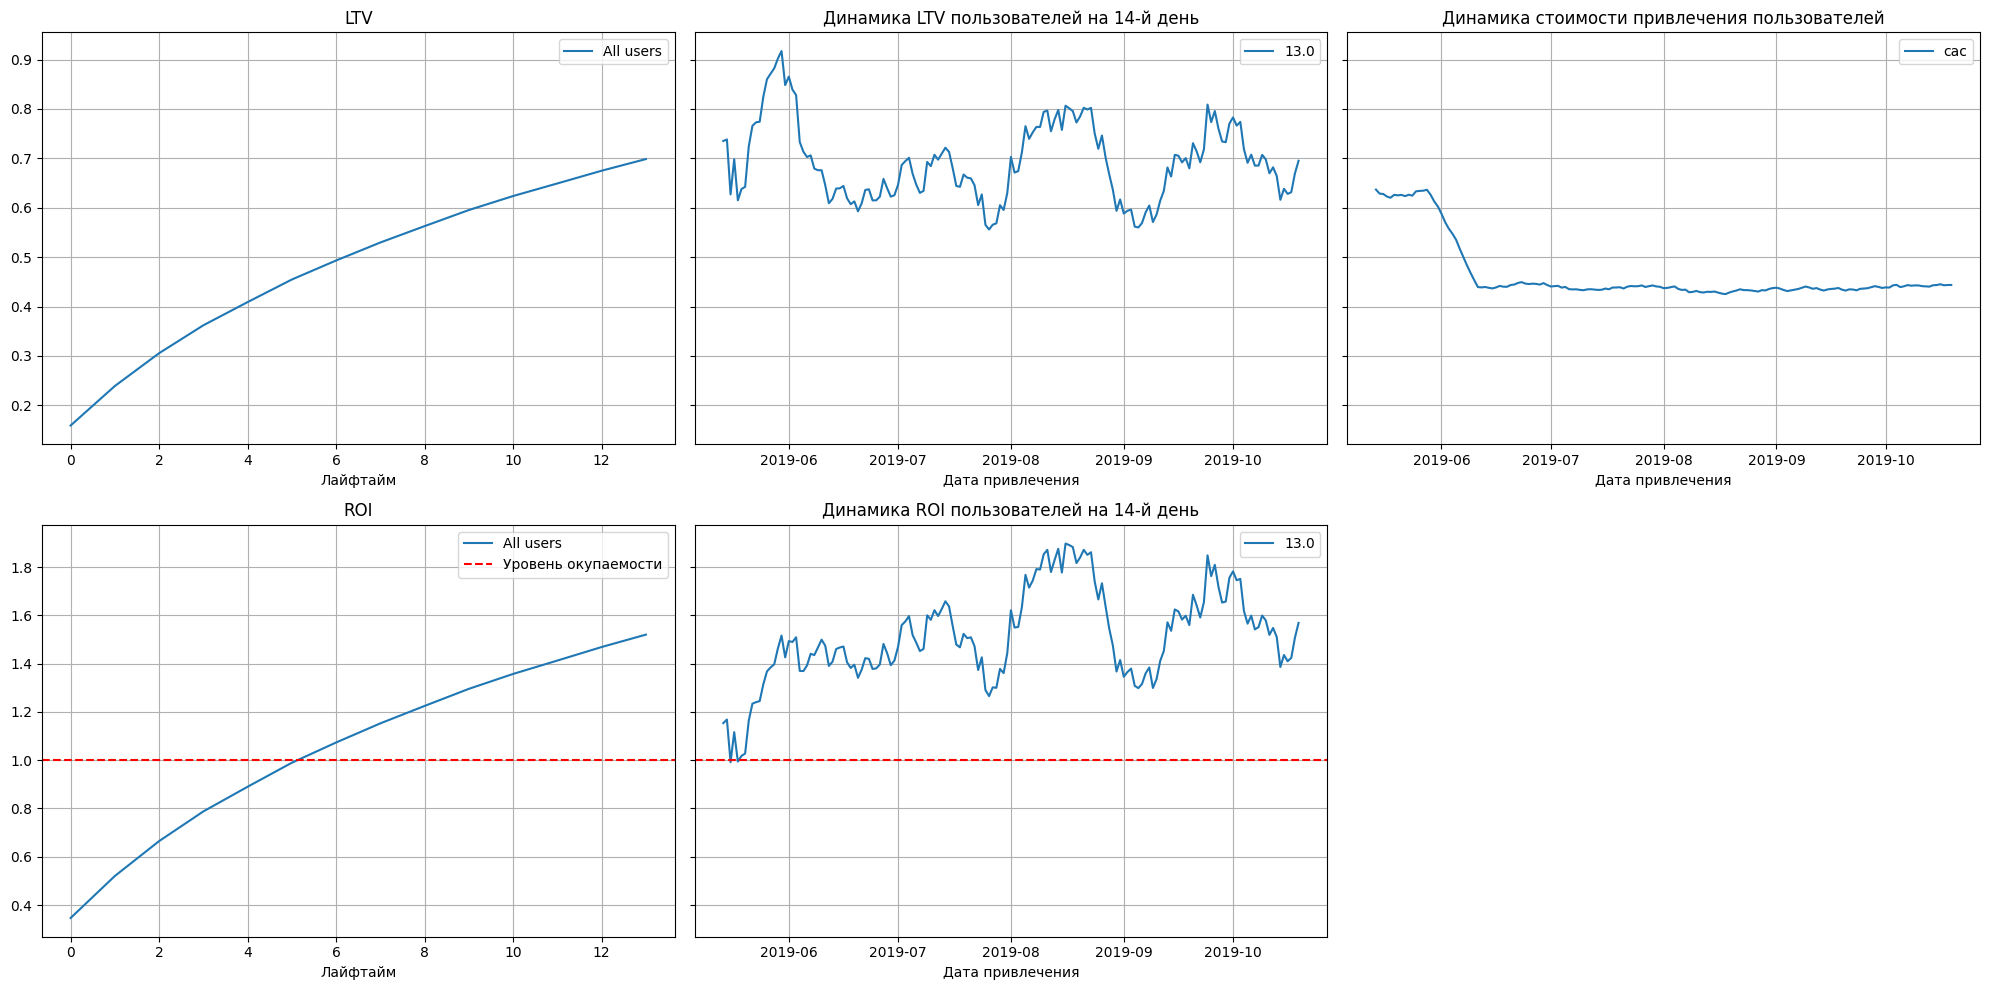

In [66]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Без Соединенных Штатов Америки мы увидели вполне положительную картину:
* стоимость привлечения пользователей не растет, а после первого месяца наблюдений даже заметно снижается
* уровень окупаемости достигается к 5 дню лайфтайма и это довольно сильно опережает целевое требование к достижению окупаемости через 14 дней
* уровень ROI для всех когорт достигших 14 дней лайфтайма стабильно держится выше уровня окупаемости.

Посмотрим теперь, что происходит с окупаемостью в европейских странах для отдельных рекламных каналов:

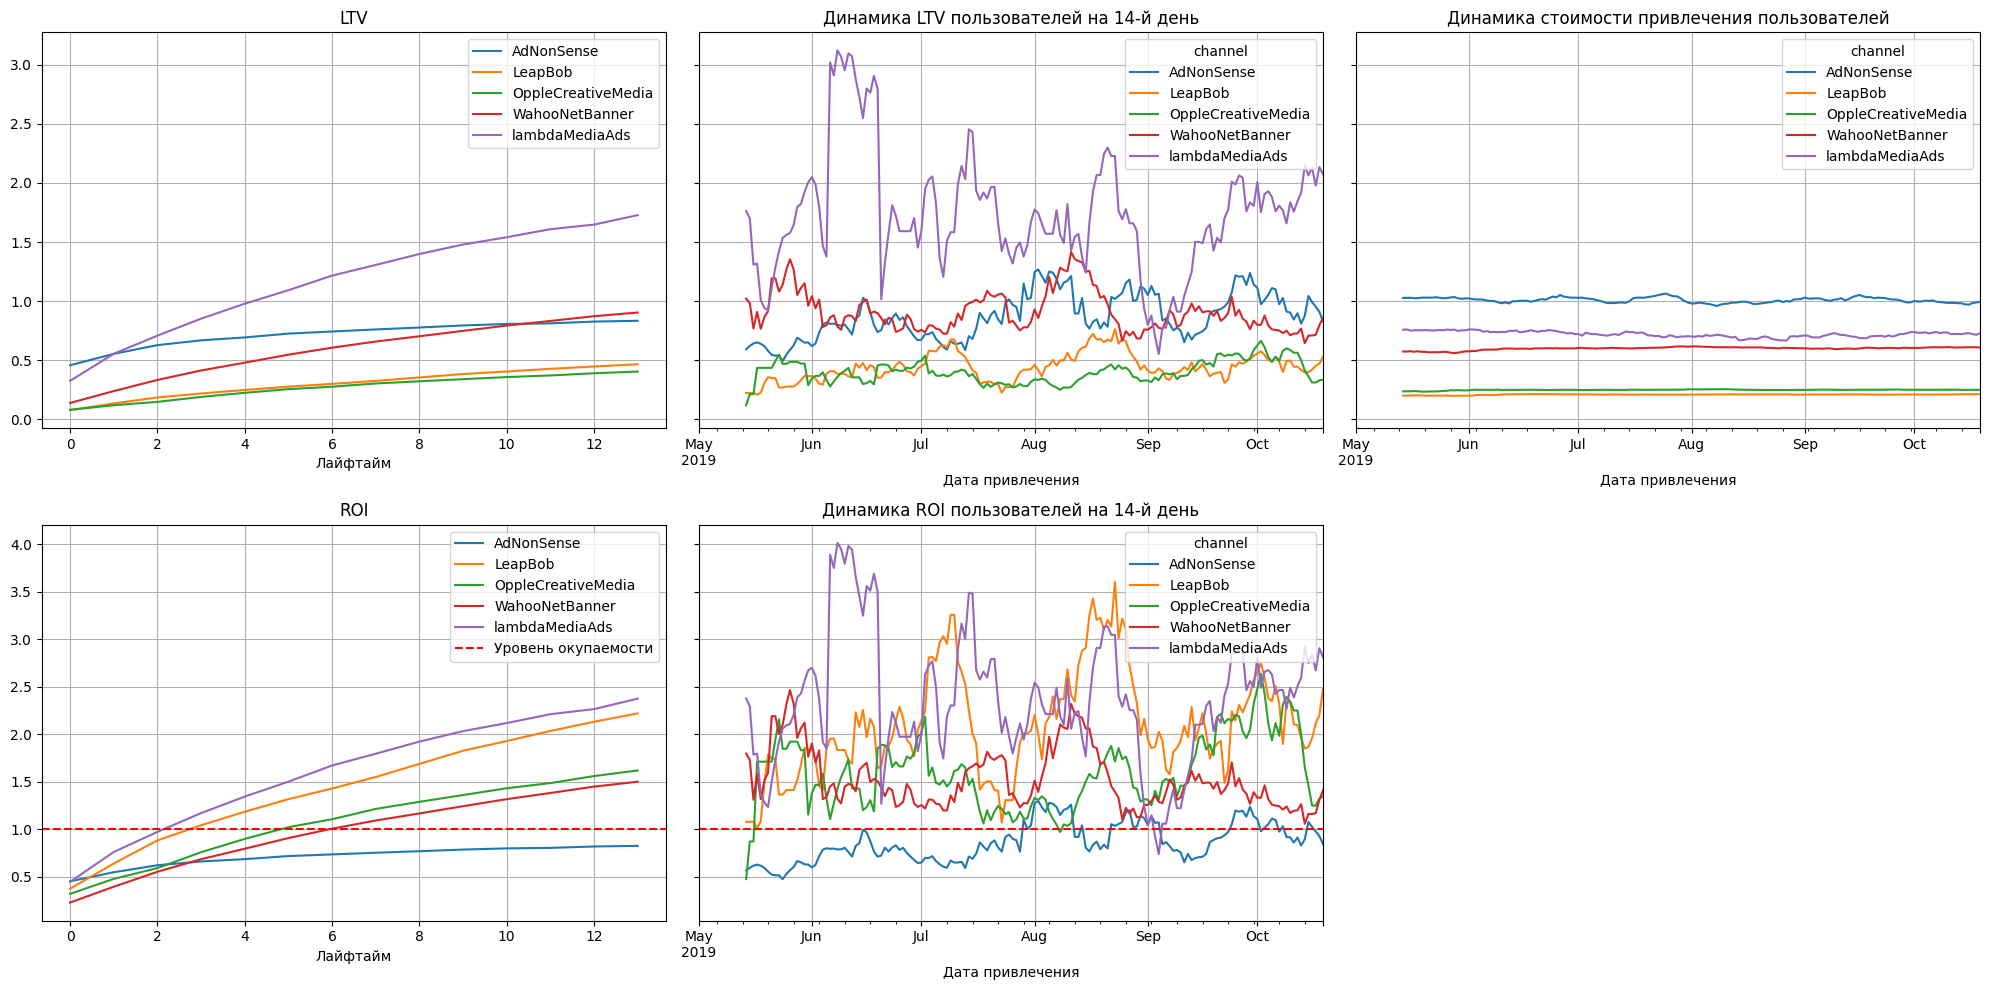

In [67]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Мы видим, что для европейский стран осталась только половина рекламных источников (5 штук). Стоимость привлечения остается постоянной, а уровня окупаемости к 14 дню не достигает только источник AdNonSense. Выше мы уже делали вывод по этому источнику о том, что его стоимость привлечения в районе 1 у.е. является слишком высокой в данной ситуации.

Учитывая, что стоимость привлечения разными рекламными каналами остается постоянной, остается непонятным вопрос довольно резкого снижения завтрат на рекламу в конце мая, когда мы смотрим на европейские затраты в общем виде. Я бы попробовал объяснить такое снижение следующим образом. Всего у нас в Европе пять рекламных каналов, есть каналы с высокой стоимостью привлечения, есть с низкой. Цена варьируется от 0,21 у.е. для канала LeapBob до 1,05 у.е. для AdNonSense за одного привлеченного пользователя. В конце мая (а мы выяснили ранее дату 29 мая 2019 года) резко изменились суммарные расходы на рекламу, но при этом в пересчете на одного клиента затраты постоянны. Это возможно только в случае пропорционального изменения числа пользователей. А ситуация, когда мы наблюдаем падение усредненного показателя затрат на одного европейского клиента говорит о том, что резкое изменение числа пользователей произошло в сторону "недорогих" каналов. Доля пользователей, привлеченных "дешевыми" источниками существенно выросла в общем числе привлеченных клиентов. Действительно, выше мы получили существенное снижение суммарных расходов 29 мая 2019 года, например, для канала AdNonSense. А это в нашем случае самый дорогой рекламный канал в Европе. Почему так случилось? Вопрос. Возможно, отдел маркетинга компании решил сократить продвижение продукта через "дорогие" европейские каналы и интенсифицировать через "дешевые". Это положительным образом сказалось на снижении стоимости привлечения пользователя.

Изучим конверсию и удержание с разбивкой по каналам для европейских стран:

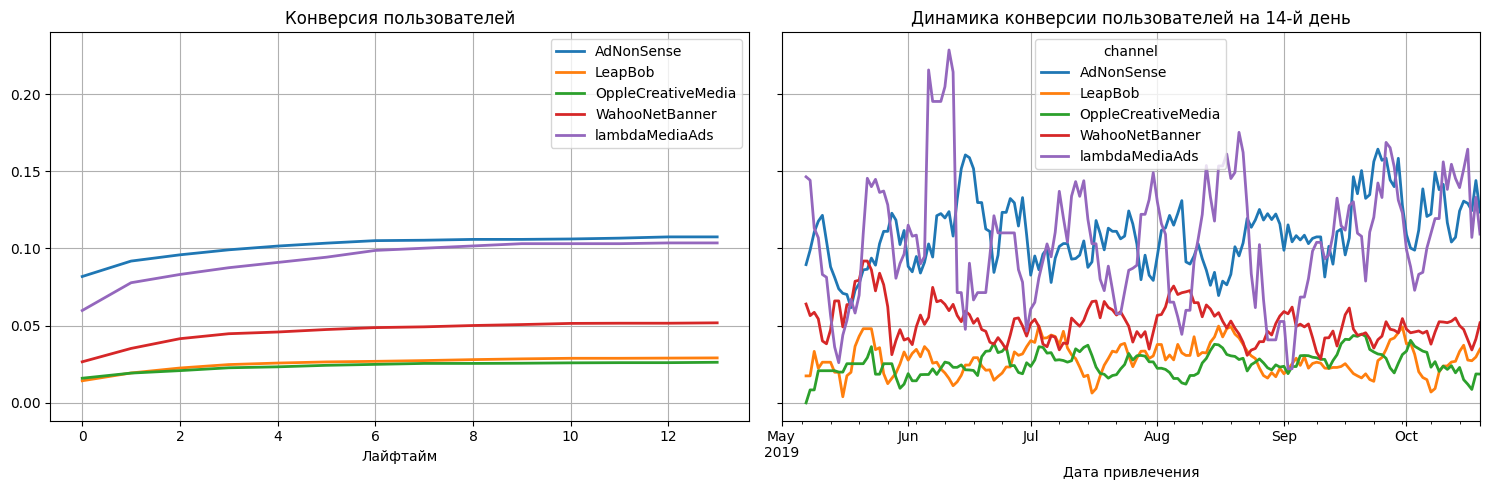

In [68]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

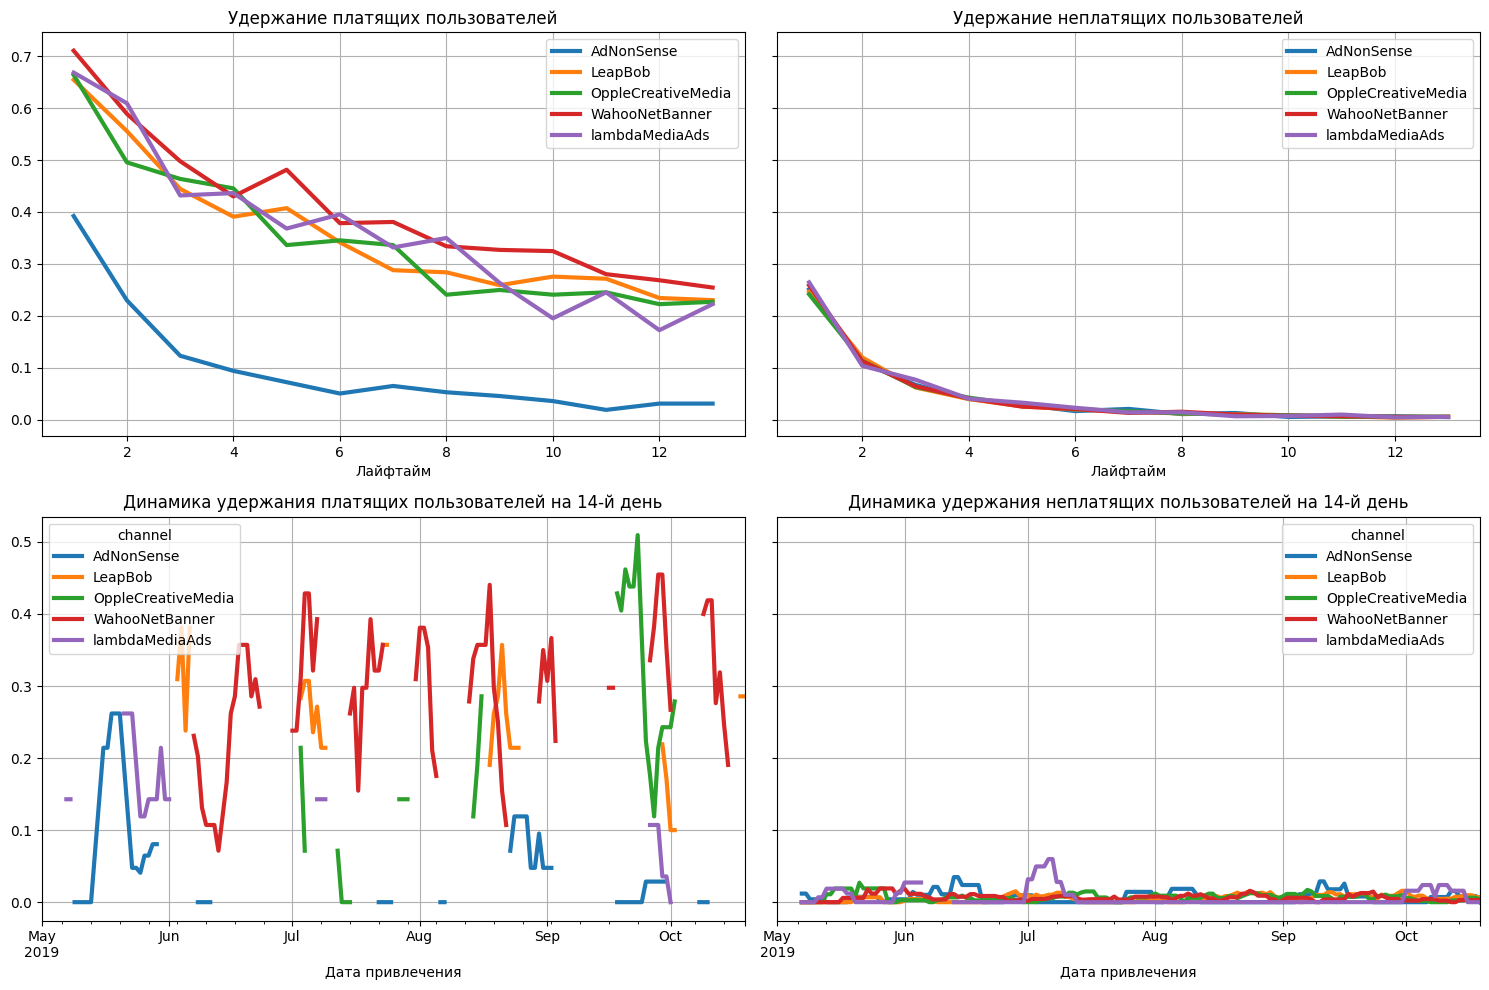

In [69]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_europe, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Графики конверсии и удержания показывают, что:
* каналы AdNonSense и lambdaMediaAds имеют конверсию в 2-3 раза выше, чем у остальных европейский каналов;
* для канала lambdaMediaAds когорты первой половины июня показали в два раза более высокую конверсию по сравнению с когортами остальных периодов (20% против 10%);
* канал AdNonSense имеет очень низкий процент удержания по сравнению с остальными европейскими каналами, особенно к концу двухнедельного лайфтайма.

Выше мы выяснили, что пользователи трех каналов - LeapBob, OppleCreativeMedia и WahooNetBanner, ведут себе похожим образом. Теперь мы знаем, что это европейские каналы. Посмотрим на них поближе:

In [70]:
profiles_europe_3 = profiles_europe.query('~((channel=="AdNonSense")|(channel=="lambdaMediaAds"))')

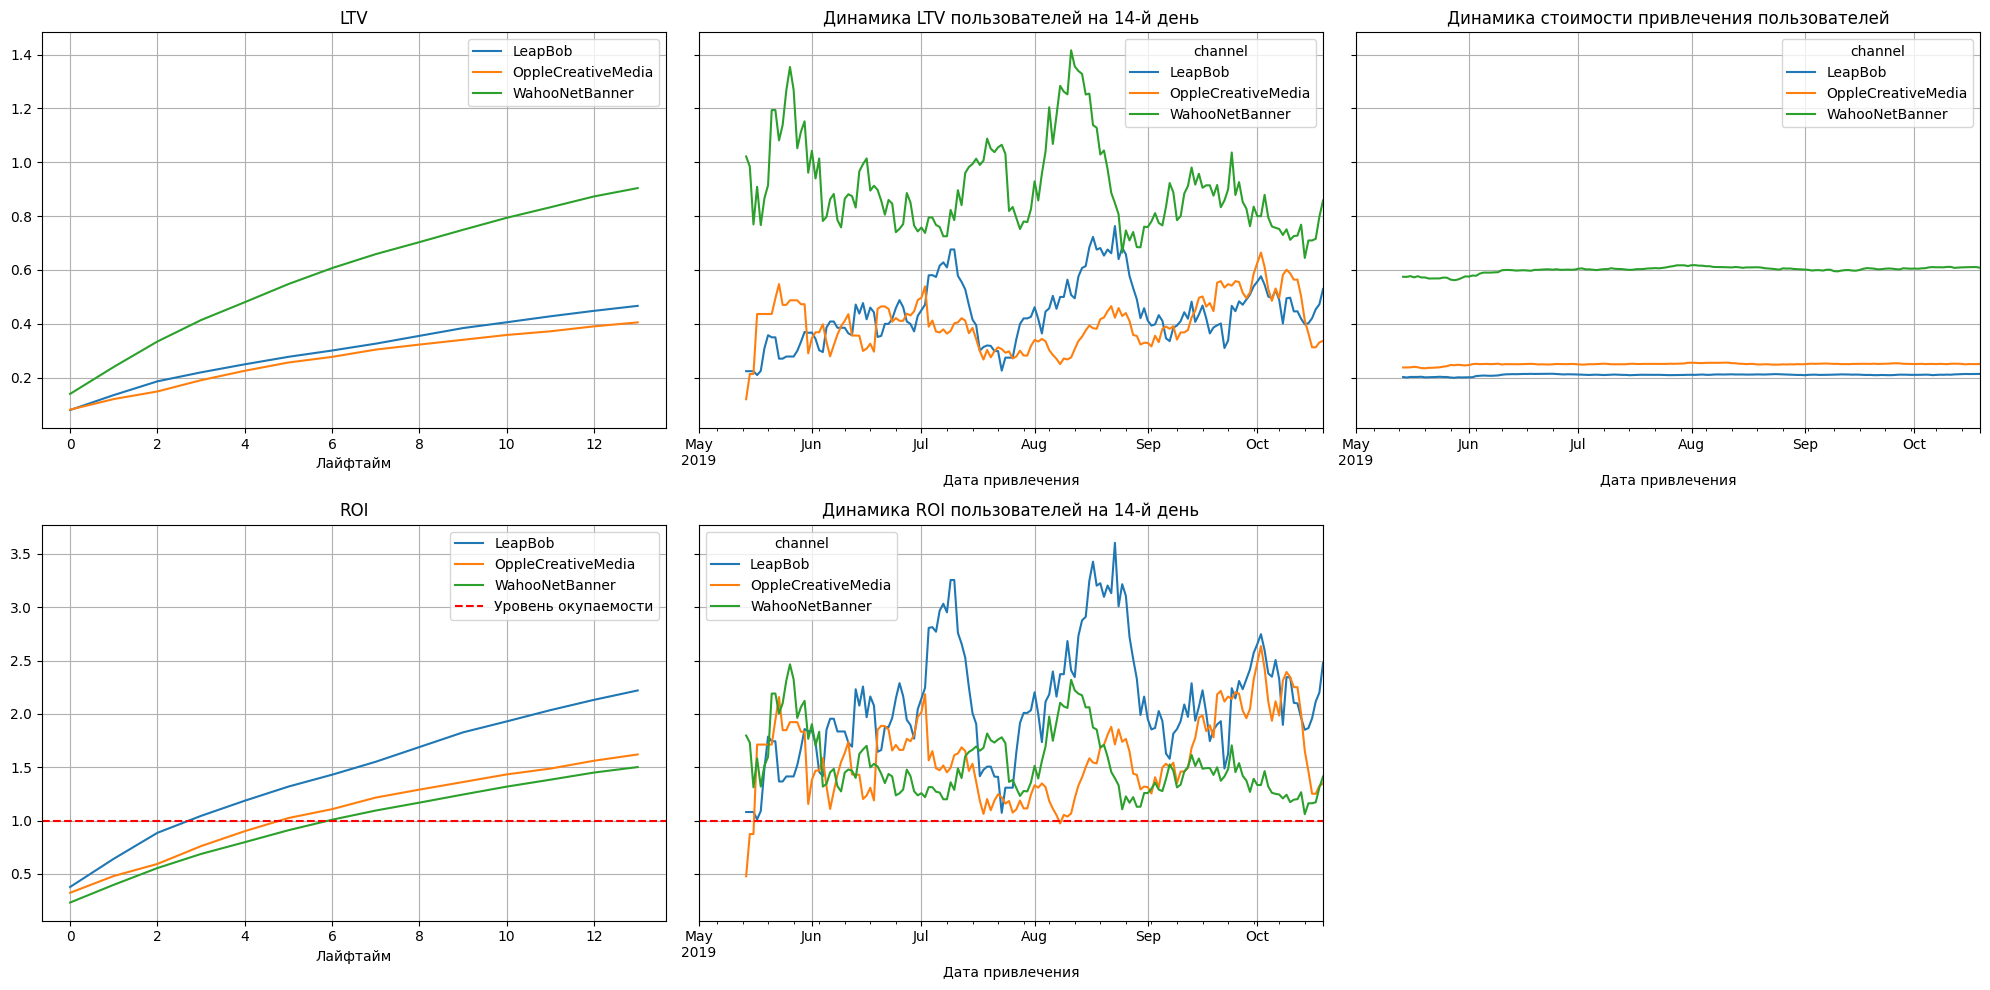

In [71]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe_3, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Ценность пользователей канала WahooNetBanner около 0,9 у.е., двух других каналов - в районе 0,4 у.е. Но и затраты на привлечение у WahooNetBanner выше почти в три раза. Возврат на инвестиции (ROI) лидирует у канала LeapBob, на каждый вложенный цент канал приносит в два с лишним раза больше. Учитывая, что три канала работают с одной и той же аудиторией пользователей, имеет смысл оставить только один канал - LeapBob. У него самые низкие расходы на привлечение, что позволит снизить общие затраты. Правда, тогда и доход несколько снизится (даже с учетом того, что все пользователи с соседних каналов перейдут на этот канал). Возможно, более предпочтительным способом было бы договориться с "дорогим" каналом WahooNetBanner о снижении стоимости рекламы. Выше мы строили график конверсии для европейских каналов и видели, что у WahooNetBanner самая высокая конверсия из этой тройки каналов. Этим и объясняется высокая ценность пользователей канала. В общем, разобравшись с вопросом платежеспособности клиентов, можно будет предложить и конкретный рецепт, каким образом проредить нашу тройку каналов. Ну и не забывать о том, что складывать все яйца в одну корзину порой бывает не только полезно, но и вредно.

#### Графики LTV, ROI и CAC пользователей из США

Теперь вернемся к США и попробуем выяснить, в чем там дело. Для начала вспомним, сколько у нас в общем платящих и неплатящих пользователей:

In [72]:
profiles.groupby('payer')['user_id'].count()

payer
False    141127
True       8881
Name: user_id, dtype: int64

А теперь оставим профили только пользователей из США и тоже посчитаем общее число платящих и неплатящих:

In [73]:
profiles_usa = profiles.query('(region=="United States")')
profiles_usa.groupby('payer')['user_id'].count()

payer
False    93100
True      6902
Name: user_id, dtype: int64

Мы видим, что пользователи из США составляют большинство. Например платящих пользователей США:

In [74]:
6902 / 8881

0.7771647337011598

Почти 78%. Нельзя просто взять и отказаться от в целом убыточной категории пользователей (из США) и потерять 78% плательщиков. Сузим эту категорию, посмотрев отдельно на клиентов с разными устройствами и разными рекламными источниками. Да, и еще нужно не забыть исключить органических пользователей опять:

In [75]:
profiles_usa = profiles_usa.query('(channel!="organic")')

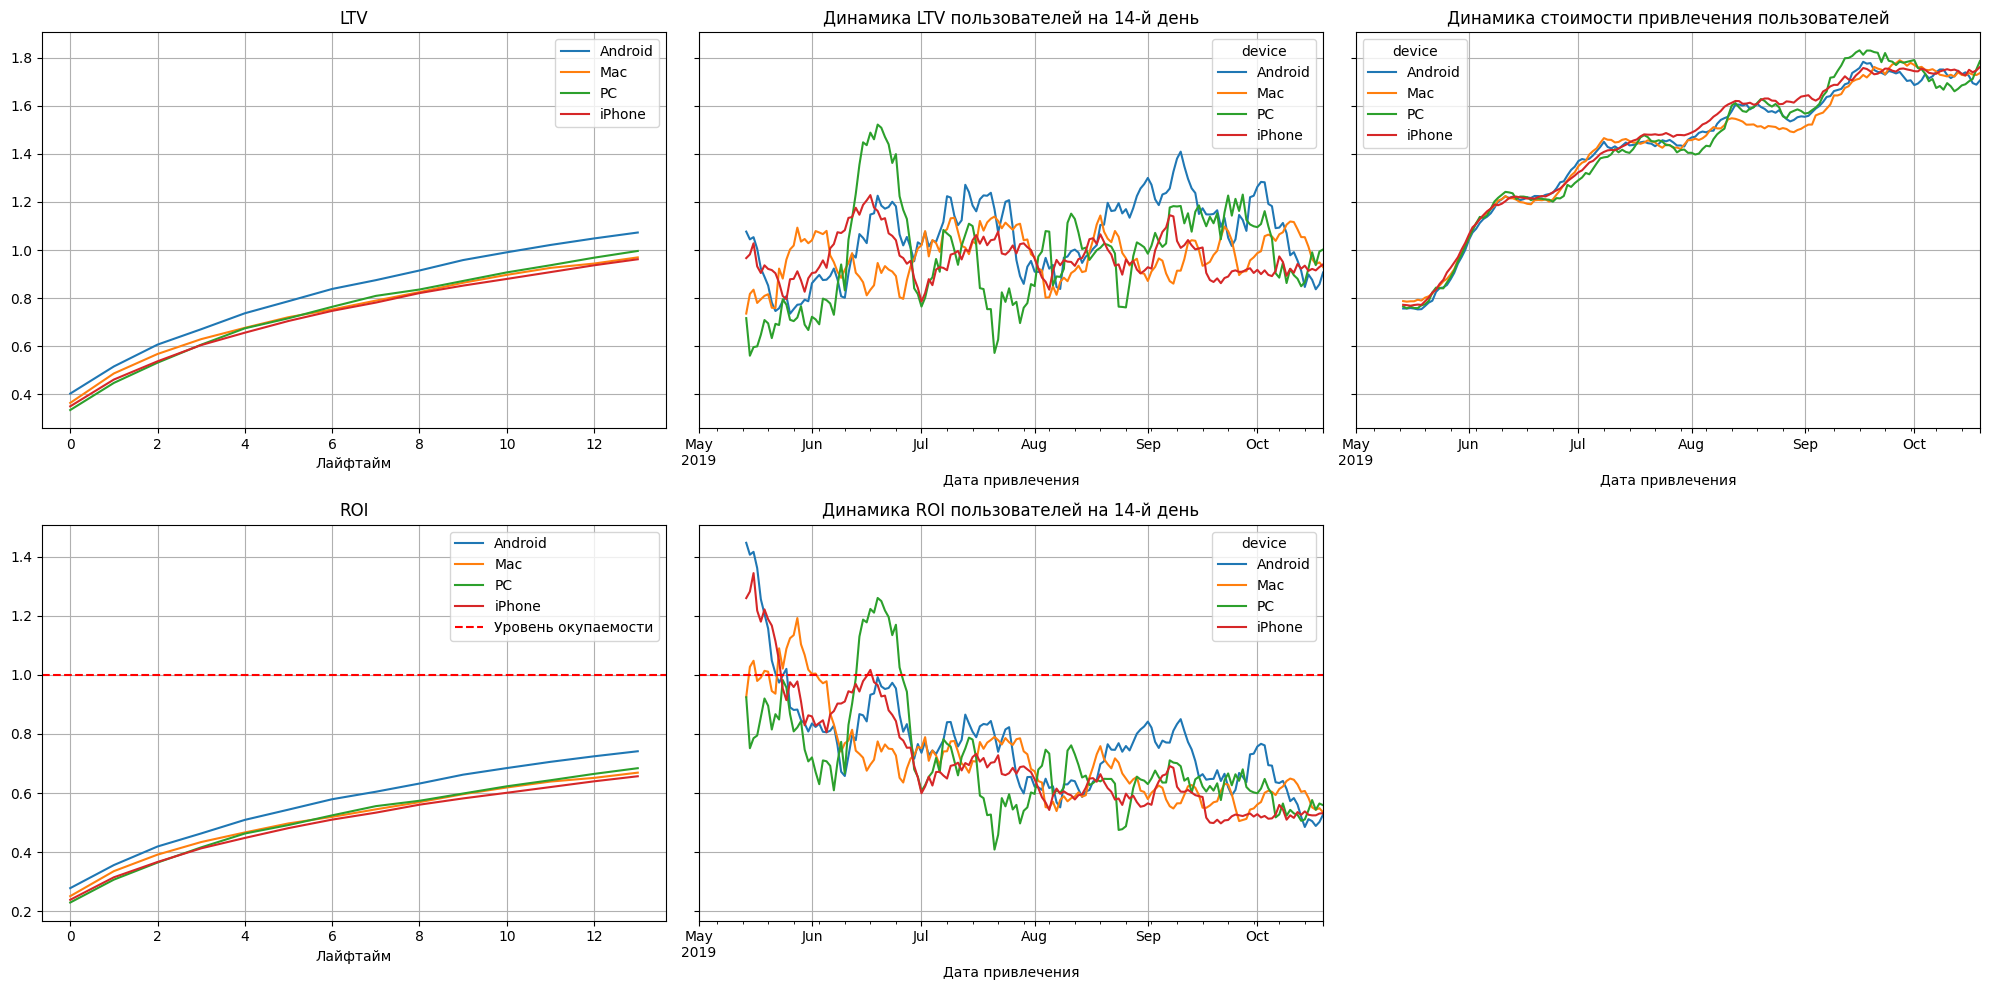

In [76]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Здесь картина примерно равная, ни с одним из устройств клиенты из США не достигают уровня окупаемости.

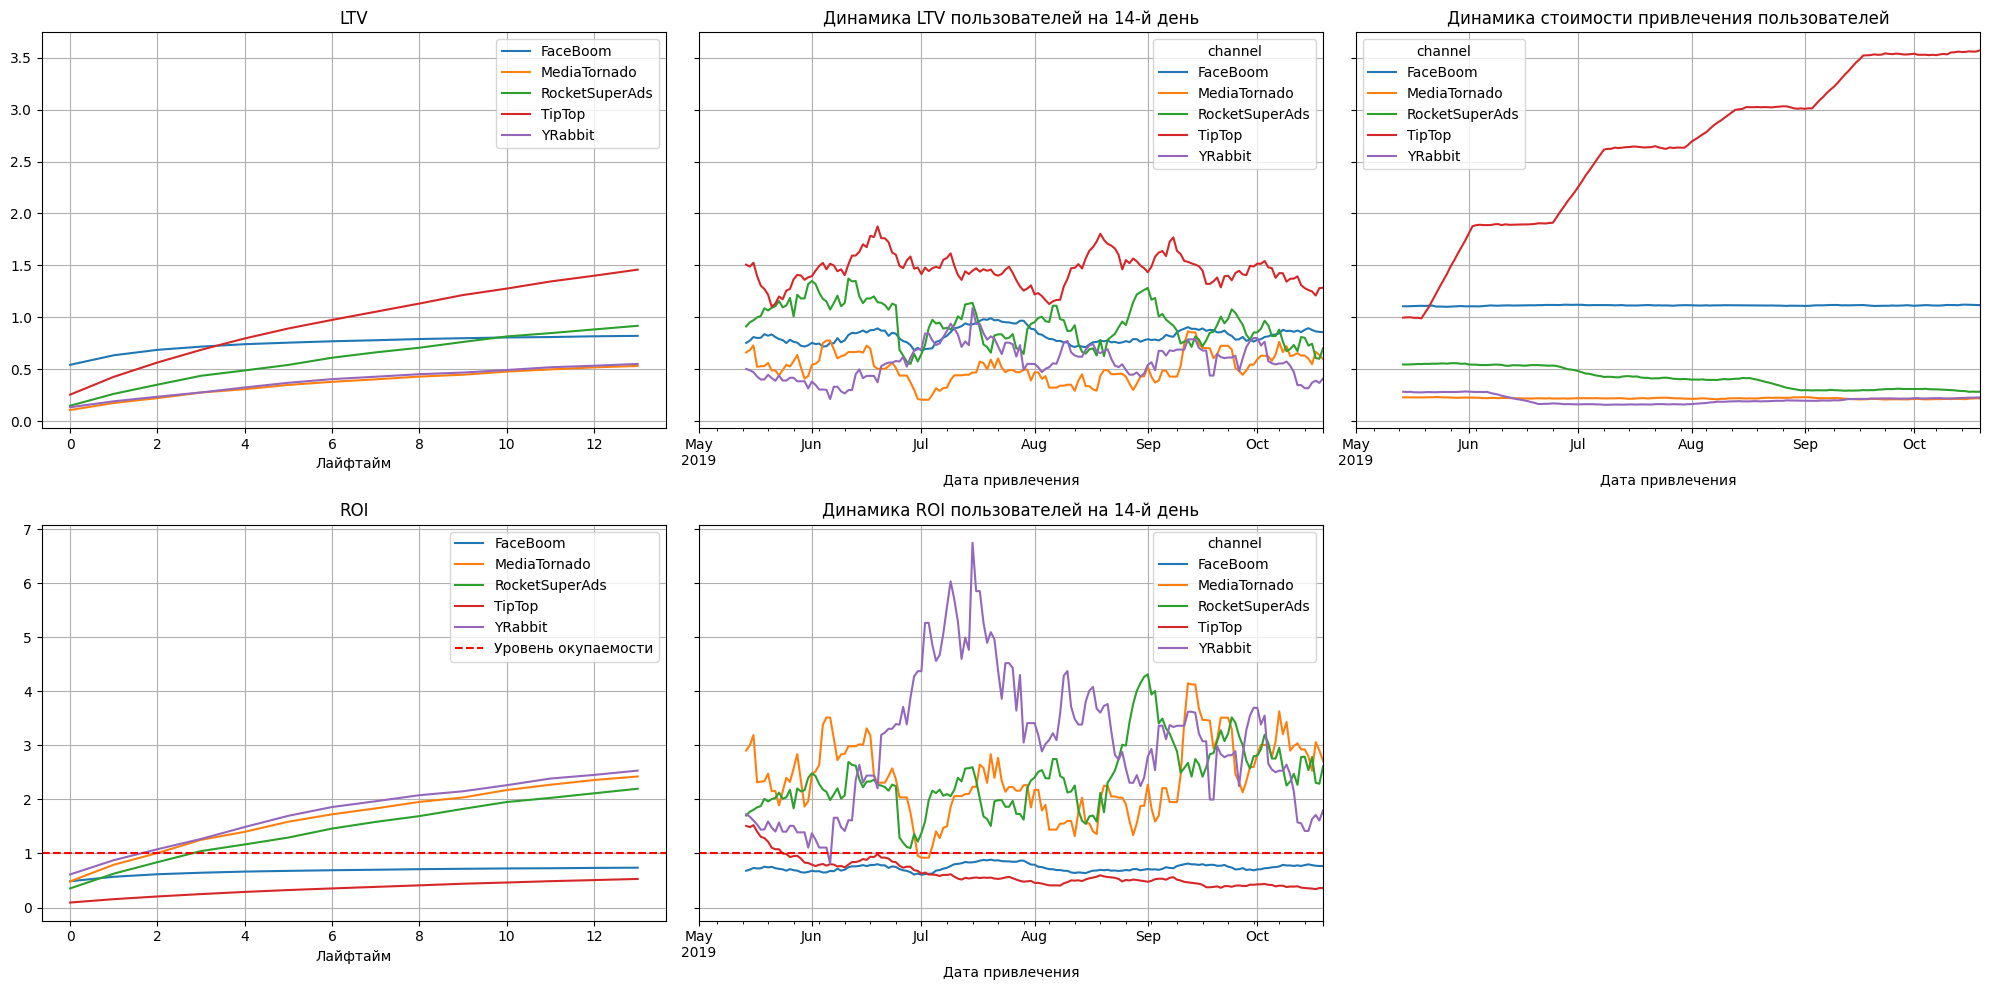

In [77]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Здесь мы встречаем наших старых знакомых, рекламные источники FaceBoom и TipTop - первый слишком дорогой, а второй дополнительно к этому еще и регулярно растет.

Также, мы теперь знаем, что для американских клиентов используются свои пять рекламных источников, а для европейских - свои, и они не пересекаются.

Посмотрим на конверсию и удержание для американских каналов

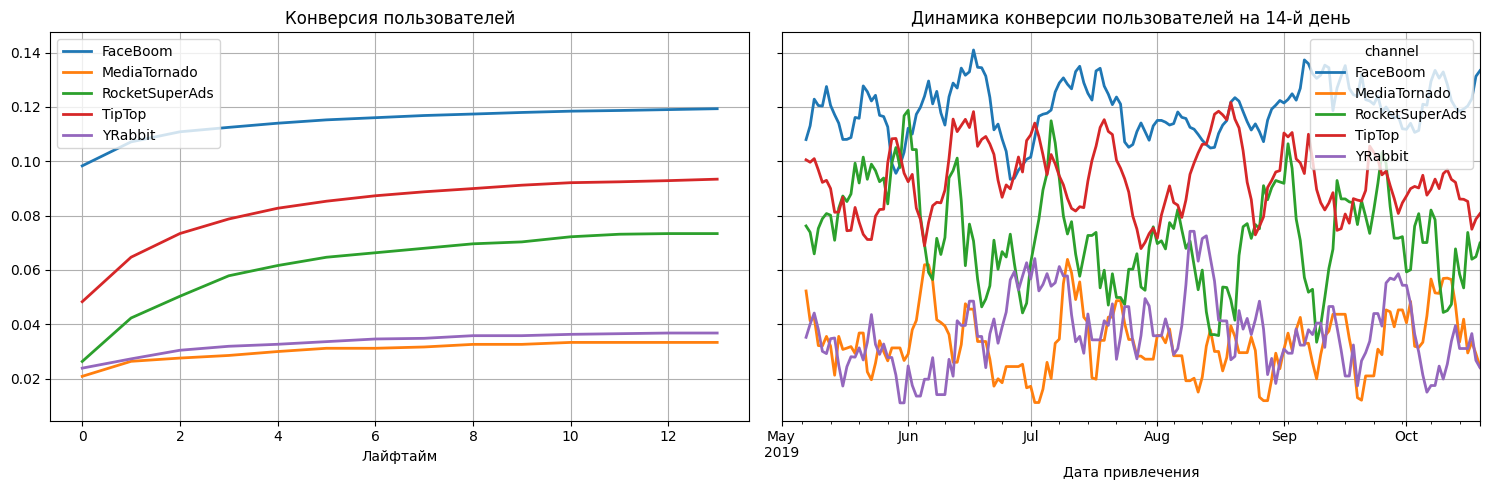

In [78]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

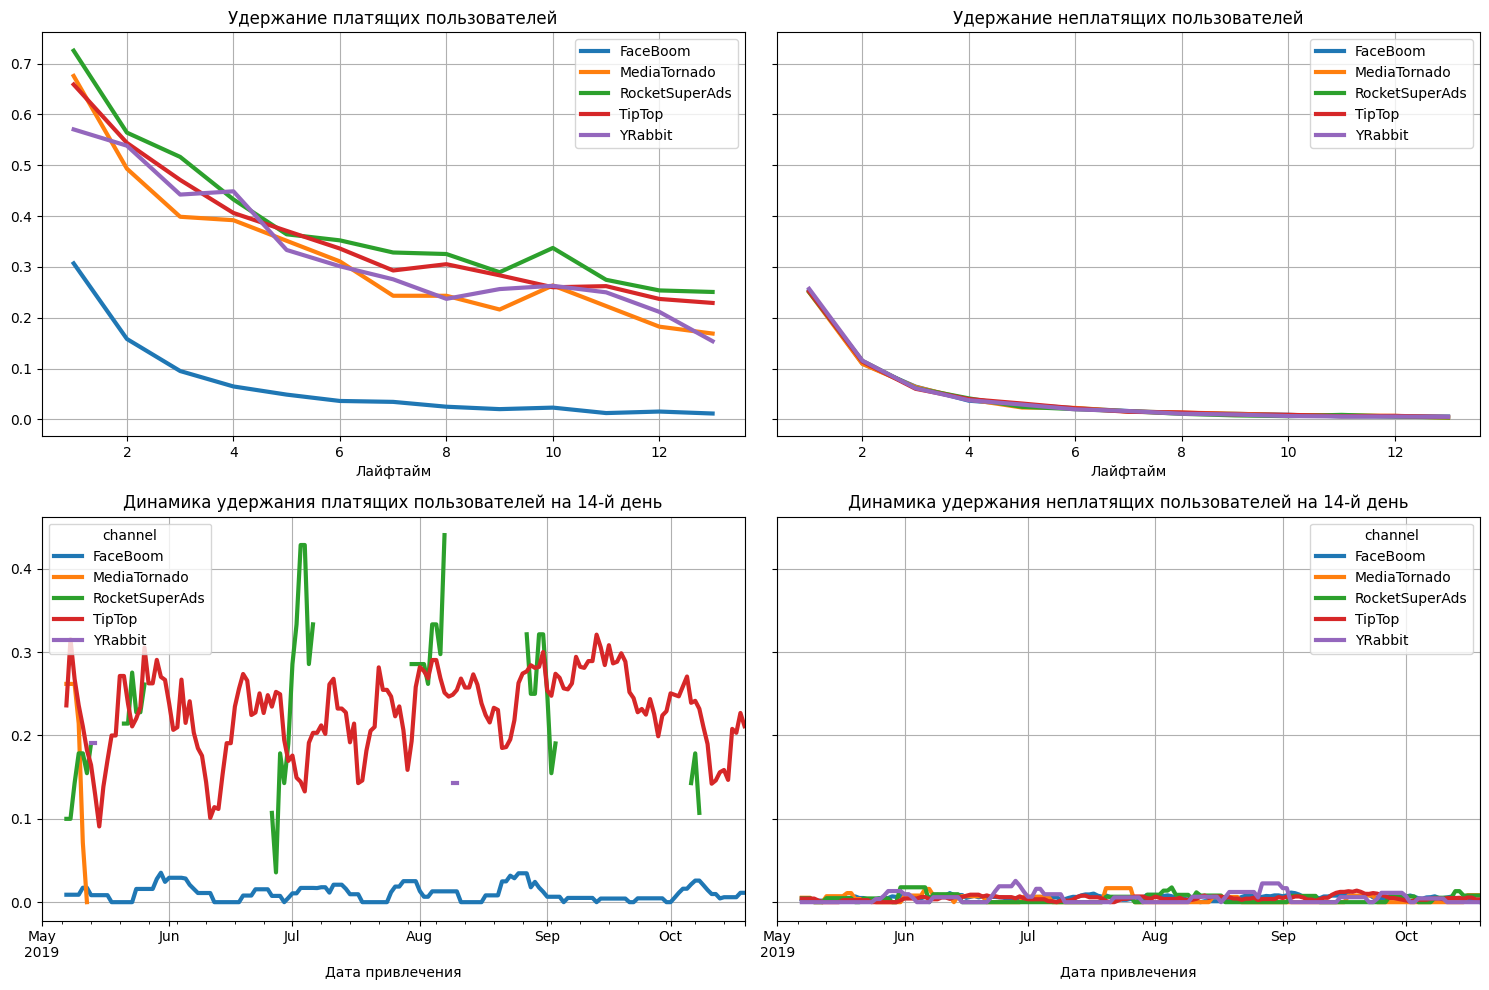

In [79]:
# смотрим удержание с разбивкой по странам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выше мы уже пробовали объяснить низкое удержание американских пользователей. Теперь мы обнаружили главного "виновника" - это канал FaceBoom. Привлеченные именно этим каналом пользователи охотно совершают первую покупку, после чего исчезают навсегда. Выше выдвигалась версия о недобросовестной рекламе, но сейчас мне пришла идея (все таки будем считать американский рекламный рынок цивилизованным местом, а не каким-то лохотроном), что в случае данного рекламного канала просто кто-то (видимо, отдел маркетинга) ошибся с выбором целевой аудитории. Ошибочно "зацепили" определенную категорию пользователей, которые быстро разобравшись, что "не туда попали", не менее быстро исчезли "за горизонтом".

Вспомним теперь, что FaceBoom привлек самое большое число платящих пользователей и по довольно высокой цене, и станет совсем грустно.

In [80]:
3557 / 8881

0.4005179596892242

Если верно наше предположение, то 40% пользователей пришли в наше приложение случайно.

Ранее мы получили, что пользователи трех американских каналов - YRabbit, RocketSuperAds и MediaTornado, ведут себе похожим образом. Изучим их:

In [81]:
profiles_usa_3 = profiles_usa.query('~((channel=="FaceBoom")|(channel=="TipTop"))')

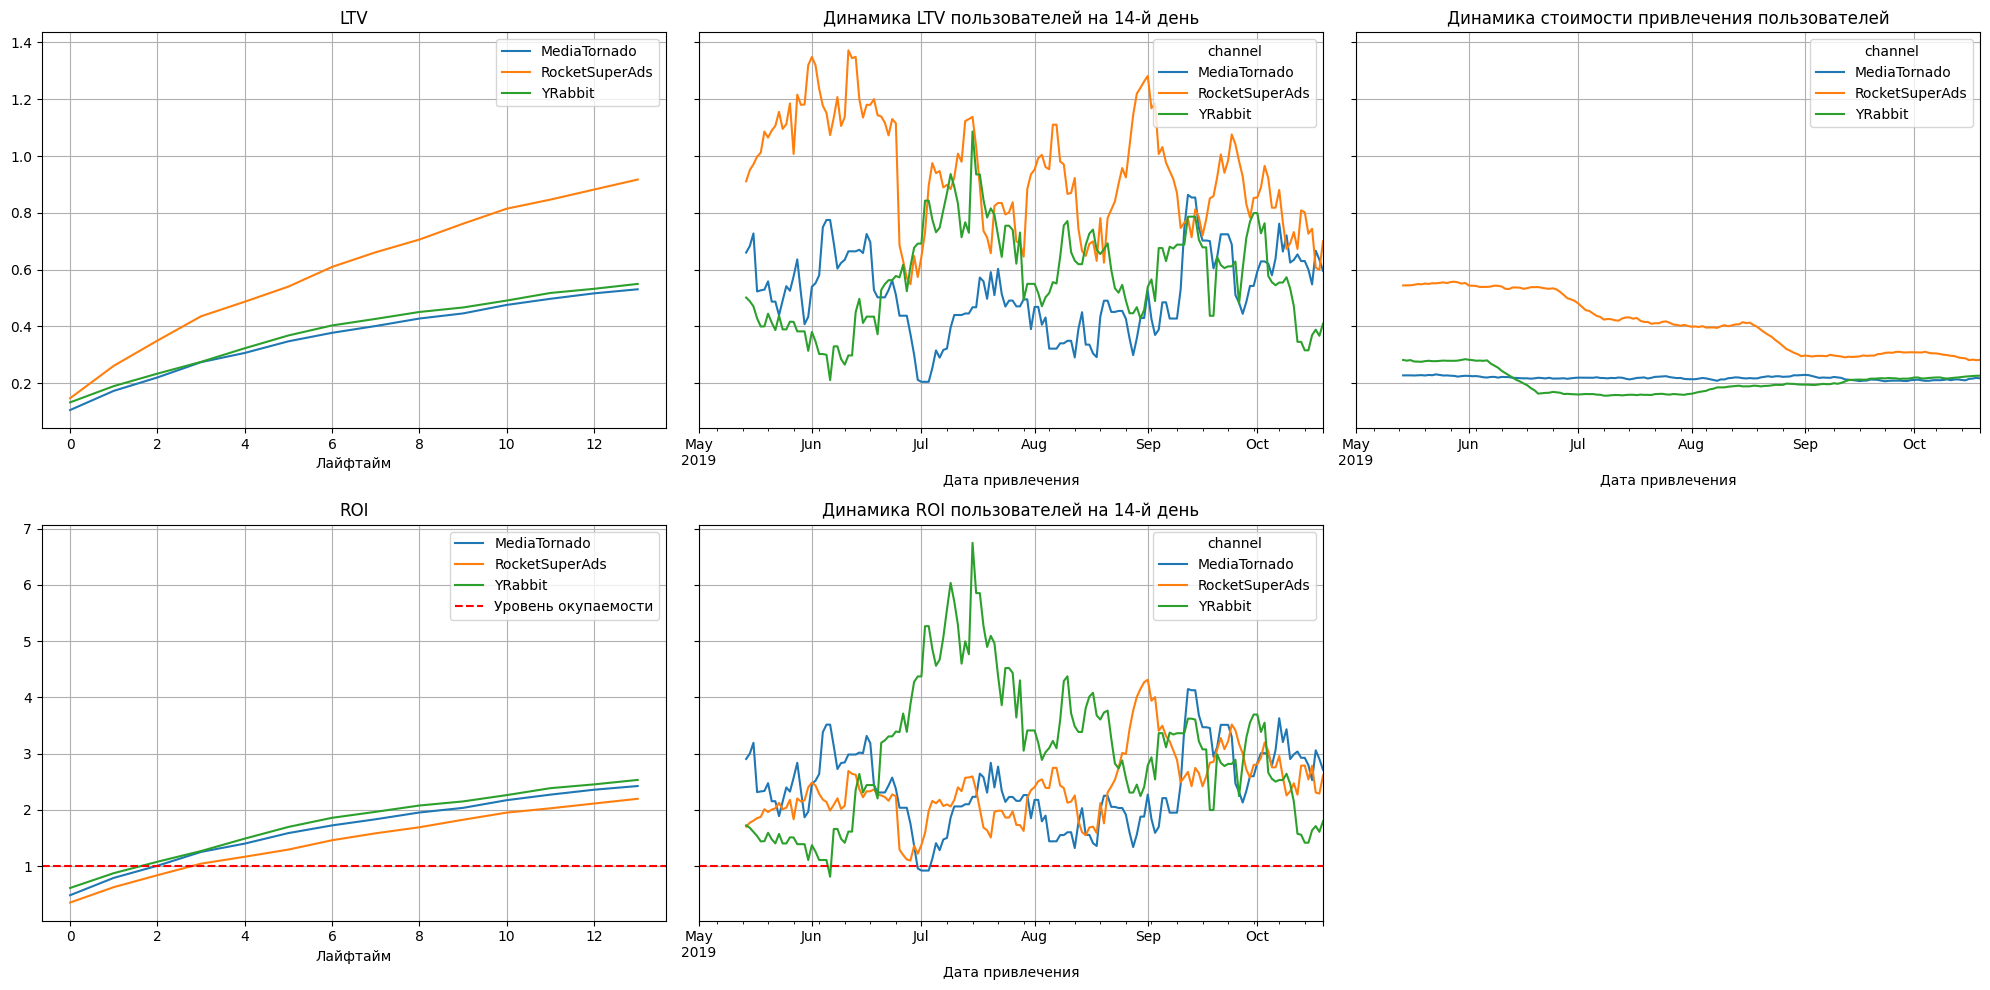

In [82]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_3, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Здесь можно отдать предпочтение каналу RocketSuperAds, пользователи которого имеют высокую ценность (благодаря опять же высокой конверсии). Да, расходы на привлечение поначалу были высокими, но ко второй половине августа опустились до вполне приемлемого уровня. При таком уровне возврат на инвестиции (ROI) будет равен примерно трем.

#### Исследование затрат на рекламный канал TipTop

Второй возмутитель спокойствия, это канал TipTop. Оставим в таблице профилей только пользователей с канала TipTop:

In [83]:
profiles_tiptop = profiles.query('(channel=="TipTop")')

Выделим отдельные устройства:

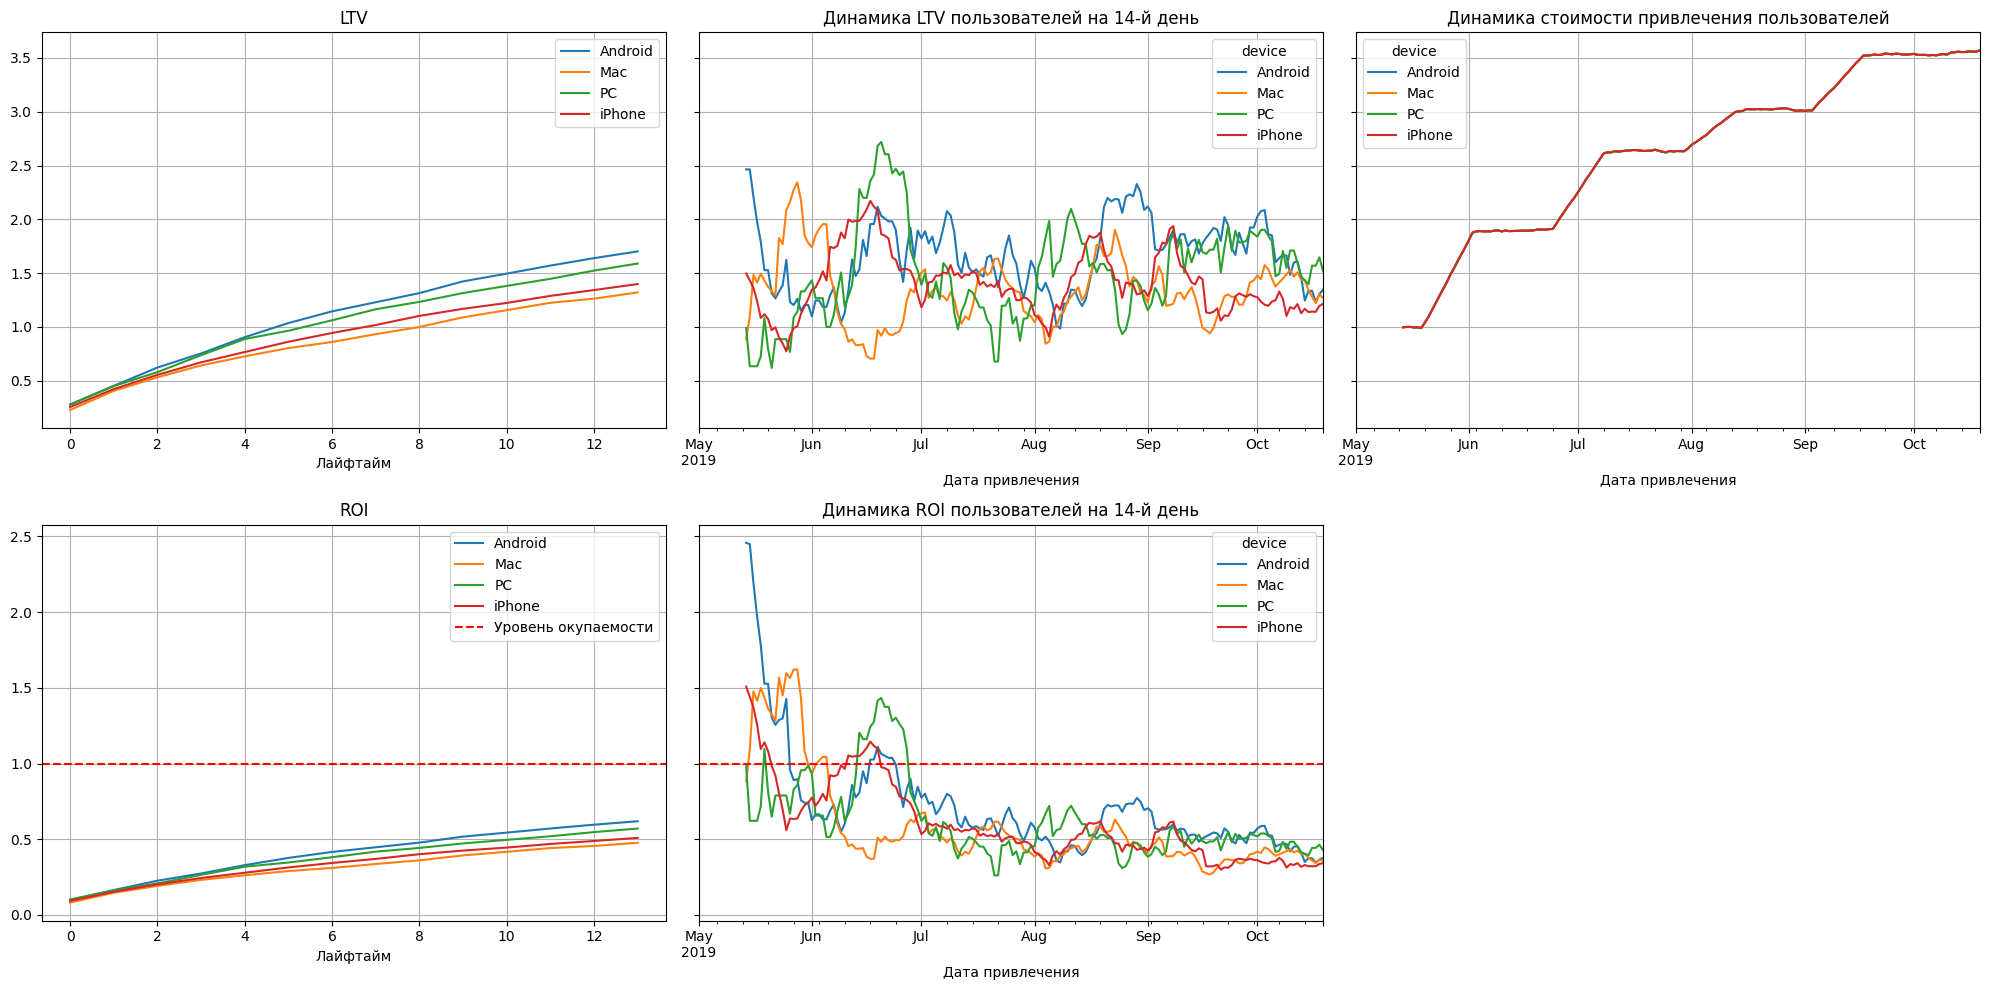

In [84]:
# смотрим окупаемость с разбивкой по используемым устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_tiptop, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Все устройства ведут себя одинаково - одинаково плохо.

Можно сопоставить таблицу профилей с затратами CAC и таблицу рекламных расходов и получить, что всего было четыре волны повышения стоимости рекламы через канал TipTop (первоначальная цена составляла 1 у.е.):
* повышение 20 мая 2019 года до 1,9 у.е.
* повышение 25 июня 2019 года до 2,6 у.е.
* повышение 31 июля 2019 года до 3 у.е.
* повышение 4 сентября 2019 года до 3,5 у.е.

Мне не удалось найти какого-то подвоха или ошибки в этих данных. Стоимость рекламы повышалась четыре раза и, невзирая на это, компания продолжала пользоваться этим рекламным каналом. Видимо, основной причиной для такого решения  являлось большое число привлекаемых клиентов.

#### Процент пользователей убыточных каналов

Ранее мы уже получали разбивку платящих пользователей по рекламным каналам. Напомним:

In [85]:
profiles_channel.sort_values(by='payer', ascending=False)

KeyError: 'payer'

Мы выяснили, что убыточными являются американские каналы FaceBoom и TipTop, и европейский
AdNonSense. Посчитаем их долю в общем числе плательщиков:

In [ ]:
(3557 + 1878 + 440) / 8881

Две трети платящих пользователей приходят через убыточные каналы.

Давайте посмотрим отдельно метрики "дорогих" и "дешевых" каналов:

In [ ]:
profiles_expensive = profiles.query('((channel=="TipTop")|(channel=="FaceBoom")|(channel=="AdNonSense"))')

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_expensive, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Ценность "дорогих" пользователей к концу второй недели немного превышает 1 у.е.

Для "дешевых" клиентов:

In [ ]:
profiles_cheap = profiles_inorganic.query('~((channel=="TipTop")|(channel=="FaceBoom")|(channel=="AdNonSense"))')

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cheap, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Ценность их не достигает 0,5 у.е.

В итоге, "дешевых" клиентов в два раза меньше, и каждый из приносит 0,7 у.е. Если предельно упростить ситуацию, у нас есть 3 клиента (2 дорогих и 1 дешевый), которые принесли 2,7 у.е. (дорогие - 1+1 и дешевый - 0,7). Т.е. на дорогих пользователей приходится 2 / 2,7 = 74 % выручки. Если предложить компании просто отказаться от дорогих рекламных каналов, то скорее всего она этого просто не переживет.

Можно попробовать отказаться от источника AdNonSense. Процент платных пользователей с этого канала составляет:

In [ ]:
440 / 8881

Около 5%. И примерно столько же он приносит денег в общей сумме выручки.

Также нужно добиться снижения стоимости рекламы на канале TipTop. Даже снижение затрат до первоначального уровня в 1 у.е. позволит исправить ситуацию. Проверим, как это могло бы повлиять:

In [ ]:
profiles_tiptop.loc[:, 'acquisition_cost'] = 1.0

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_tiptop, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Уже к концу первой недели пользователи с канала TipTop достигали бы уровня окупаемости

А если оценивать ситуацию вцелом:

In [ ]:
profiles_inorganic_new = profiles_inorganic

In [ ]:
profiles_inorganic_new['acquisition_cost'].update(profiles_tiptop['acquisition_cost'])

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_inorganic_new, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

То видно, что уровня окупаемости можно достичь после 8 дня лайфтайма.

**Промежуточные выводы**

Поскольку нас интересовала оценка окупаемости рекламы, то было решено исключить органических пользователей из данной оценки, чтобы они не улучшали рассматриваемые показатели. В соответствие с бизнес-планом, пользователи должны окупаться в течение двух недель. Мы получили среднюю ценность одного пользователя за две недели примерно на уровне 0,9 у.е. При этом стоимость привлечения клиентов практически постоянно растет и не превышает среднюю ценность клиента только для когорт первого месяца наблюдений. В итоге в среднем всем когортам удалось достичь только 80% уровня окупаемости к концу второй недели, т.е. реклама не окупается.

Что касается конверсии пользователей, совершивших хотя бы одну покупку в течение 2-х недель, то она менялась от 5,5% вначале до 8% в конце двухнедельного интервала. Удержание платящих пользователей за 14 дней опускалось да отметки 12%, неплатящих - до 1% примерно.

Анализ окупаемости рекламы с разбивкой по устройствам показал, что ценность пользователя с PC ниже, чем у пользователей с другими устройствами. Правда стоимость привлечения клиента с PC самая низкая. В итоге, только пользователи с PC достигают уровня окупаемости на 12 день лайфтайма.

Изучение окупаемости рекламы с разбивкой по странам показало, что только пользователи из США не выходят на окупаемость, несмотря на более высокую ценность. Причиной является постоянный рост расходов на рекламу. Также, было обнаружено, что американцы показали более высокую конверсию и более низкое удержание по сравнению с европейскими пользователями.

Рассмотрение окупаемости  для отдельных рекламных каналов, показало, что три канала не достигают уровня окупаемости AdNonSense, FaceBoom и TipTop. Первые два имеют слишком высокую стоимость привлечения примерно в 1 у.е., а третий канал показывает ступенчатый рост затрат с 1 у.е. в начале до 3,5 у.е. в конце.

Также мы проверили, какую ценность представляют органические пользователи. За две недели лайфтайма она составила в среднем 0,3 у.е. С учетом падения 29 мая 2019 года числа органических клиентов с 500 до 250, можно в связи с этим оценить ежедневные потери компании в 75 у.е.

Мы рассмотрели окупаемость рекламы в Европе, исключив пользователей из США. В таком варианте реклама вполне окупается. Мало того, стоимость привлечения пользователей резко падает в конце первого месяца наблюдений, видимо это происходит как раз 29 мая 2019 года. Уровень окупаемости в среднем достигается к 5 дню лайфтайма. Если разбить европейские данные по отдельным рекламным каналам, мы увидим, что осталось только 5 рекламных источников и не окупается только канал AdNonSense из-за высокой стоимости привлечения. Резкое падение 29 мая 2019 года средней стоимости привлечения при постоянстве затрат на привлечение по отдельным каналам можно объяснить увеличением доли пользователей, привлеченных недорогими каналами.

Была проанализирована отдельно окупаемость рекламы в США. В США также получили только пять рекламных каналов. Не достигают уровня окупаемости два американских канала - FaceBoom и TipTop. На графике конверсии самые высокие показатели у двух названных каналов, а на графике удержания канал FaceBoom достигает практически 0% к концу второй недели. Возможно, данный канал случайно "зацепил" нецелевую аудиторию (а это 40% всех платящих пользователей), которая совершила только по одной покупке.

Анализ роста затрат на канал TipTop не выявил ошибки в данных. Стоимость рекламы повышалась четыре раза и компания, стремясь сохранить поток пользователей с данного канала, всякий раз соглашалась с ухудшением условий, предлагаемых рекламным каналом.

Резюмируя, две трети платящих пользователей пришли с трех убыточных каналов. Ценность таких пользователей составляет примерно 1 у.е. Ценность клиентов, пришедших с недорогих каналов составляет 0,7 у.е. Таким образом, около 75% выручки приходится на клиентов с убыточных каналов.

### Выводы



#### Причины неэффективности привлечения пользователей

Основным негативным фактором оказались некоторые рекламные каналы. Для пользователей из США это TipTop и FaceBoom, а для пользователей из Европы - AdNonSense. FaceBoom и AdNonSense показали слишком высокую стоимость привлечения одного пользователя - более 1 у.е при средней "ценности" пользователя около 0,9 у.е. Канал TipTop увеличил стоимость привлечения отдельного клиента с 1 до 3,5 у.е за рассматриваемый период, и при средней стоимости привлечения данным каналом 2,8 у.е. и ценности пользователя в 1,5 у.е., компания уходит в минус. Канал FaceBoom привлекает пользователей, которые очень плохо удерживаются и почти всегда ограничиваются только одним заказом. Возможно, произошла ошибка с выбором целевой аудитории. Дорогие каналы привлекают 66% всех платящих пользователей, которые генерируют до 75% выручки компании. Недорогие каналы привлекают слишком мало пользователей. Ежедневное число органических пользователей 29 мая 2019 года упало в два раза.

Была обнаружена синхронная активность пользователей трех европейских рекламных каналов и то же самое для трех американских каналов. Это позволило выдвинуть предположение, что указанные тройки каналов используют одни и те же площадки для привлечения пользователей, а значит, отбирают "хлеб" друг у друга. В таком случае, мы можем не "распылять" пользователей по нескольким каналам, а собрать их на том канале, где они имеют более высокую конверсию, удержание, ценность и более низкие затраты на привлечение.

#### Рекомендации для отдела маркетинга

1. Строго необходимо пересмотреть существующие отношения с каналом TipTop. Данный рекламный источник является основным "поставщиком" финансовых проблем в компании. Средняя стоимость привлечения составляет 2,8 у.е при средней ценности пользователя 1,5 у.е. Отказ от услуг канала приведет к потере 21% платящих пользователей, а учитывая их высокую ценность, процент потери выручки будет еще выше. Поэтому, рекомендуется обсудить с каналом снижение стоимости привлечения до первоначального уровня в 1 у.е.
2. Необходимо выяснить причину, по которой пользователи, привлеченные каналом FaceBoom плохо удерживаются, хотя при этом демонстрируют самую высокую конверсию. Возможно, отделу маркетинга имеет смысл скорректировать целевую аудиторию, для которой канал рекламирует наше приложение, и дать каналу уточненные данные по аудитории. 
3. Отказаться от использования рекламного источника AdNonSense, либо договориться с каналом о снижении стоимости услуг. Затраты на привлечение одного пользователя через канал составляют 1,05 у.е., а средняя ценность пользователя за две недели находится в районе отметки 0,8 у.е. Следовательно, рекомендуется обсудить с каналом возможность снижения стоимости по привлечению ниже уровня 0,8 у.е. Если договориться не получается, отказаться от услуг канала. Это приведет к потере примерно 5% пользователей и выручки.
4. Необходимо выяснить причину двухкратного падения числа органических пользователей 29 мая 2019 года и устранить ее. Это вернет примерно 75 у.е. ежедневной выручки.

5. Предлагается отказаться от услуг некоторых европейских и американских каналов (возможно, на временной основе), чтобы собрать пользователей на канале, более выгодном с точки зрения возврата инвестиций. Так, для европейских пользователей рекомендуется оставить канал LeapBob, который демонстрирует более высокий ROI, равный 2,25, чем каналы WahooNetBanner и OppleCreativeMedia. Если удастся договориться о снижении стоимости рекламы, то более выгодным будет оставить канал WahooNetBanner, который демонстрирует более высокую конверсию и как следствие высокую ценность пользователей (при сравнимом удержании). Для американских пользователей рекомендуется оставить канал RocketSuperAds (и временно приостановить сотрудничество с MediaTornado и YRabbit), стоимость услуг которого заметно снизилась в последнее время, а ценность пользователей достаточно высока, возврат на инвестиции ROI равен примерно трем.

6. В целом, необходимо работать над расширением привлечения пользователей через указанные в предыдущем пункте каналы. График динамики привлечения клиентов показывает, что в пиковые периоды этот показатель раза в 1,5 выше, чем в среднем за все время наблюдения, а значит потенциал для масштабирования привлечения пользователей через данные каналы существует.

7. В ходе анализа графиков выявлено несколько аномальных всплесков активности пользователей. К таковым можно отнести:
* резкий рост динамики удержания для когорт середины мая пользователей PC;
* резкий рост динамики конверсии для когорт 20-х чисел мая европейских пользователей;
* резкий рост динамики ROI для когорт середины июля пользователей с рекламного канала YRabbit;
* резкий рост динамики ROI для когорт середины июля и середины августа пользователей из Великобритании.

Рекомендуется изучить эти случаи и выявить причины возникновения положительного роста активности пользователей.